In [1]:
ls

 D 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 46E7-B8C7

 D:\mj\big\AE 디렉터리

2020-09-20  오후 09:48    <DIR>          .
2020-09-20  오후 09:48    <DIR>          ..
2020-09-20  오후 08:42    <DIR>          .ipynb_checkpoints
2020-09-20  오후 09:31             2,874 AE.py
2020-09-20  오후 08:41           770,556 Rec_user_item_matrix2.xlsx
2020-09-20  오후 09:48           573,332 Rec_user_item_matrix3.xlsx
2020-09-20  오후 08:00             1,381 Untitled.ipynb
2020-09-20  오후 09:25           257,001 Untitled0.ipynb
               5개 파일           1,605,144 바이트
               3개 디렉터리  433,572,618,240 바이트 남음


In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("Rec_user_item_matrix2.xlsx")

In [2]:
#X = data.reset_index().drop('user', axis = 1).rename(columns = {'index' : 'user'})

In [3]:
data

,user,0,1,2,3,4,5,6,7,8,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
0,1-0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1-1,0.000000,0.0,0.0,0.0,4.382027,3.562466,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1-10,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1-11,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1-12,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,6.807382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9-23,3.433987,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
238,9-6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.068904,0.0
239,9-7,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.248495,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
240,9-8,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
X = data.iloc[:,1:]

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, losses
import numpy as np

#(82x1133)
#57

class AutoEncoder(tf.keras.Model):
    def __init__(self, X_size, latent_dim):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim
        self.X_size = X_size
        self.encoder = tf.keras.Sequential([
            layers.Dense(latent_dim, activation = 'selu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2)
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(X_size,activation = 'selu')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(np.asarray(X),np.asarray(X),test_size=0.1,shuffle=False,random_state=1004)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [76]:

#

In [77]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reduceLR = ReduceLROnPlateau( 
    monitor='loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.1,          # callback 호출시 학습률을 1/2로 줄인다
    patience=500,         # epoch 10 동안 개선되지 않으면 callback이 호출
)
earlystopping = EarlyStopping(monitor='loss',  # 모니터 기준 설정 (val_loss) 
                              patience=2000,         # 15회 Epoch동안 개선되지 않는다면 종료
                             )

In [78]:
tf.__version__

'2.3.0'

In [79]:
def masked_mse(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1)
    return masked_mse

def masked_rmse(y_true, y_pred):
        # masked function
        mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
        # masked squared error
        masked_squared_error = K.square(mask_true * (y_true - y_pred))
        masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
        return masked_mse

def masked_rmse_clip(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    y_pred = K.clip(y_pred, 1, 10)
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
    return masked_mse

In [80]:
autoencoder = AutoEncoder(x_train.shape[1], 128)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=optimizer, loss=masked_rmse, metrics=[masked_rmse_clip]) 


hist = autoencoder.fit(x_train, x_train,
                epochs=20000,
                batch_size = 32,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks = [reduceLR,earlystopping])

Epoch 1/20000
7/7 [==============================] - 0s 25ms/step - loss: 4.7086 - masked_rmse_clip: 4.0584 - val_loss: 4.1147 - val_masked_rmse_clip: 3.5571
Epoch 2/20000
7/7 [==============================] - 0s 6ms/step - loss: 2.4398 - masked_rmse_clip: 2.3809 - val_loss: 3.6851 - val_masked_rmse_clip: 2.8884
Epoch 3/20000
7/7 [==============================] - 0s 6ms/step - loss: 1.4811 - masked_rmse_clip: 1.4428 - val_loss: 3.9980 - val_masked_rmse_clip: 2.8739
Epoch 4/20000
7/7 [==============================] - 0s 6ms/step - loss: 1.3067 - masked_rmse_clip: 1.2796 - val_loss: 3.6396 - val_masked_rmse_clip: 2.7927
Epoch 5/20000
7/7 [==============================] - 0s 5ms/step - loss: 1.2041 - masked_rmse_clip: 1.1826 - val_loss: 3.3230 - val_masked_rmse_clip: 2.7067
Epoch 6/20000
7/7 [==============================] - 0s 6ms/step - loss: 1.1494 - masked_rmse_clip: 1.1321 - val_loss: 3.2148 - val_masked_rmse_clip: 2.6217
Epoch 7/20000
7/7 [==============================] - 0s 6

Epoch 53/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.4807 - masked_rmse_clip: 0.4798 - val_loss: 2.1634 - val_masked_rmse_clip: 1.8592
Epoch 54/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.4807 - masked_rmse_clip: 0.4801 - val_loss: 2.1531 - val_masked_rmse_clip: 1.8480
Epoch 55/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.4687 - masked_rmse_clip: 0.4678 - val_loss: 2.1518 - val_masked_rmse_clip: 1.8462
Epoch 56/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.4470 - masked_rmse_clip: 0.4467 - val_loss: 2.1240 - val_masked_rmse_clip: 1.8156
Epoch 57/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.4492 - masked_rmse_clip: 0.4487 - val_loss: 2.1450 - val_masked_rmse_clip: 1.8409
Epoch 58/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.4474 - masked_rmse_clip: 0.4471 - val_loss: 2.1155 - val_masked_rmse_clip: 1.8072
Epoch 59/20000
7/7 [==============================] 

Epoch 105/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.3588 - masked_rmse_clip: 0.3585 - val_loss: 1.9035 - val_masked_rmse_clip: 1.5626
Epoch 106/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3520 - masked_rmse_clip: 0.3517 - val_loss: 1.9441 - val_masked_rmse_clip: 1.6132
Epoch 107/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3674 - masked_rmse_clip: 0.3673 - val_loss: 1.8769 - val_masked_rmse_clip: 1.5325
Epoch 108/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3563 - masked_rmse_clip: 0.3562 - val_loss: 1.8959 - val_masked_rmse_clip: 1.5556
Epoch 109/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3682 - masked_rmse_clip: 0.3679 - val_loss: 1.9007 - val_masked_rmse_clip: 1.5611
Epoch 110/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3824 - masked_rmse_clip: 0.3822 - val_loss: 1.8793 - val_masked_rmse_clip: 1.5351
Epoch 111/20000
7/7 [=========================

7/7 [==============================] - 0s 5ms/step - loss: 0.3126 - masked_rmse_clip: 0.3127 - val_loss: 1.8357 - val_masked_rmse_clip: 1.4878
Epoch 157/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.3207 - masked_rmse_clip: 0.3206 - val_loss: 1.8436 - val_masked_rmse_clip: 1.4966
Epoch 158/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3189 - masked_rmse_clip: 0.3188 - val_loss: 1.8585 - val_masked_rmse_clip: 1.5138
Epoch 159/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3201 - masked_rmse_clip: 0.3202 - val_loss: 1.8505 - val_masked_rmse_clip: 1.5047
Epoch 160/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3287 - masked_rmse_clip: 0.3287 - val_loss: 1.8439 - val_masked_rmse_clip: 1.4976
Epoch 161/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.3268 - masked_rmse_clip: 0.3265 - val_loss: 1.8518 - val_masked_rmse_clip: 1.5074
Epoch 162/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.2999 - masked_rmse_clip: 0.3000 - val_loss: 1.8353 - val_masked_rmse_clip: 1.4876
Epoch 208/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.3068 - masked_rmse_clip: 0.3068 - val_loss: 1.8075 - val_masked_rmse_clip: 1.4536
Epoch 209/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2964 - masked_rmse_clip: 0.2961 - val_loss: 1.8187 - val_masked_rmse_clip: 1.4672
Epoch 210/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.3070 - masked_rmse_clip: 0.3069 - val_loss: 1.8334 - val_masked_rmse_clip: 1.4851
Epoch 211/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.3096 - masked_rmse_clip: 0.3096 - val_loss: 1.8135 - val_masked_rmse_clip: 1.4604
Epoch 212/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.3012 - masked_rmse_clip: 0.3012 - val_loss: 1.8290 - val_masked_rmse_clip: 1.4798
Epoch 213/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.2789 - masked_rmse_clip: 0.2787 - val_loss: 1.8158 - val_masked_rmse_clip: 1.4653
Epoch 259/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2646 - masked_rmse_clip: 0.2647 - val_loss: 1.8052 - val_masked_rmse_clip: 1.4530
Epoch 260/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2721 - masked_rmse_clip: 0.2721 - val_loss: 1.8121 - val_masked_rmse_clip: 1.4622
Epoch 261/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2857 - masked_rmse_clip: 0.2856 - val_loss: 1.8144 - val_masked_rmse_clip: 1.4650
Epoch 262/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2674 - masked_rmse_clip: 0.2675 - val_loss: 1.8085 - val_masked_rmse_clip: 1.4576
Epoch 263/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2962 - masked_rmse_clip: 0.2960 - val_loss: 1.8047 - val_masked_rmse_clip: 1.4545
Epoch 264/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2567 - masked_rmse_clip: 0.2567 - val_loss: 1.7994 - val_masked_rmse_clip: 1.4472
Epoch 310/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2459 - masked_rmse_clip: 0.2460 - val_loss: 1.7976 - val_masked_rmse_clip: 1.4457
Epoch 311/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2513 - masked_rmse_clip: 0.2514 - val_loss: 1.8000 - val_masked_rmse_clip: 1.4491
Epoch 312/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2652 - masked_rmse_clip: 0.2654 - val_loss: 1.7999 - val_masked_rmse_clip: 1.4487
Epoch 313/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2537 - masked_rmse_clip: 0.2536 - val_loss: 1.8039 - val_masked_rmse_clip: 1.4527
Epoch 314/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2505 - masked_rmse_clip: 0.2505 - val_loss: 1.7935 - val_masked_rmse_clip: 1.4400
Epoch 315/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2488 - masked_rmse_clip: 0.2489 - val_loss: 1.7986 - val_masked_rmse_clip: 1.4479
Epoch 361/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2379 - masked_rmse_clip: 0.2379 - val_loss: 1.7920 - val_masked_rmse_clip: 1.4400
Epoch 362/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2490 - masked_rmse_clip: 0.2491 - val_loss: 1.7887 - val_masked_rmse_clip: 1.4362
Epoch 363/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2584 - masked_rmse_clip: 0.2585 - val_loss: 1.7908 - val_masked_rmse_clip: 1.4388
Epoch 364/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2480 - masked_rmse_clip: 0.2480 - val_loss: 1.8003 - val_masked_rmse_clip: 1.4500
Epoch 365/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2468 - masked_rmse_clip: 0.2468 - val_loss: 1.7942 - val_masked_rmse_clip: 1.4430
Epoch 366/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2527 - masked_rmse_clip: 0.2528 - val_loss: 1.7884 - val_masked_rmse_clip: 1.4369
Epoch 412/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2327 - masked_rmse_clip: 0.2326 - val_loss: 1.7870 - val_masked_rmse_clip: 1.4350
Epoch 413/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2477 - masked_rmse_clip: 0.2479 - val_loss: 1.7943 - val_masked_rmse_clip: 1.4434
Epoch 414/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2273 - masked_rmse_clip: 0.2275 - val_loss: 1.7829 - val_masked_rmse_clip: 1.4297
Epoch 415/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2406 - masked_rmse_clip: 0.2406 - val_loss: 1.7946 - val_masked_rmse_clip: 1.4441
Epoch 416/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2245 - masked_rmse_clip: 0.2246 - val_loss: 1.7832 - val_masked_rmse_clip: 1.4297
Epoch 417/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2409 - masked_rmse_clip: 0.2411 - val_loss: 1.7914 - val_masked_rmse_clip: 1.4413
Epoch 463/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2284 - masked_rmse_clip: 0.2284 - val_loss: 1.7953 - val_masked_rmse_clip: 1.4468
Epoch 464/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2172 - masked_rmse_clip: 0.2173 - val_loss: 1.7919 - val_masked_rmse_clip: 1.4426
Epoch 465/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2255 - masked_rmse_clip: 0.2258 - val_loss: 1.7815 - val_masked_rmse_clip: 1.4294
Epoch 466/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2195 - masked_rmse_clip: 0.2196 - val_loss: 1.7852 - val_masked_rmse_clip: 1.4336
Epoch 467/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2336 - masked_rmse_clip: 0.2337 - val_loss: 1.7796 - val_masked_rmse_clip: 1.4270
Epoch 468/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.2184 - masked_rmse_clip: 0.2185 - val_loss: 1.7877 - val_masked_rmse_clip: 1.4386
Epoch 514/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2274 - masked_rmse_clip: 0.2273 - val_loss: 1.7781 - val_masked_rmse_clip: 1.4264
Epoch 515/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2288 - masked_rmse_clip: 0.2291 - val_loss: 1.7751 - val_masked_rmse_clip: 1.4221
Epoch 516/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2398 - masked_rmse_clip: 0.2398 - val_loss: 1.7754 - val_masked_rmse_clip: 1.4233
Epoch 517/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2458 - masked_rmse_clip: 0.2457 - val_loss: 1.7807 - val_masked_rmse_clip: 1.4297
Epoch 518/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2402 - masked_rmse_clip: 0.2403 - val_loss: 1.7861 - val_masked_rmse_clip: 1.4354
Epoch 519/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2343 - masked_rmse_clip: 0.2343 - val_loss: 1.7843 - val_masked_rmse_clip: 1.4344
Epoch 565/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2167 - masked_rmse_clip: 0.2169 - val_loss: 1.7938 - val_masked_rmse_clip: 1.4459
Epoch 566/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2206 - masked_rmse_clip: 0.2208 - val_loss: 1.7837 - val_masked_rmse_clip: 1.4340
Epoch 567/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2070 - masked_rmse_clip: 0.2072 - val_loss: 1.7799 - val_masked_rmse_clip: 1.4293
Epoch 568/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2085 - masked_rmse_clip: 0.2086 - val_loss: 1.7753 - val_masked_rmse_clip: 1.4234
Epoch 569/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2117 - masked_rmse_clip: 0.2119 - val_loss: 1.7774 - val_masked_rmse_clip: 1.4263
Epoch 570/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2150 - masked_rmse_clip: 0.2152 - val_loss: 1.7841 - val_masked_rmse_clip: 1.4345
Epoch 616/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2127 - masked_rmse_clip: 0.2130 - val_loss: 1.7843 - val_masked_rmse_clip: 1.4347
Epoch 617/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2090 - masked_rmse_clip: 0.2092 - val_loss: 1.7725 - val_masked_rmse_clip: 1.4203
Epoch 618/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2201 - masked_rmse_clip: 0.2203 - val_loss: 1.7745 - val_masked_rmse_clip: 1.4232
Epoch 619/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2388 - masked_rmse_clip: 0.2389 - val_loss: 1.7769 - val_masked_rmse_clip: 1.4263
Epoch 620/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2137 - masked_rmse_clip: 0.2139 - val_loss: 1.7832 - val_masked_rmse_clip: 1.4339
Epoch 621/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.2169 - masked_rmse_clip: 0.2170 - val_loss: 1.7722 - val_masked_rmse_clip: 1.4204
Epoch 667/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2082 - masked_rmse_clip: 0.2084 - val_loss: 1.7665 - val_masked_rmse_clip: 1.4135
Epoch 668/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2160 - masked_rmse_clip: 0.2161 - val_loss: 1.7784 - val_masked_rmse_clip: 1.4272
Epoch 669/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2035 - masked_rmse_clip: 0.2036 - val_loss: 1.7842 - val_masked_rmse_clip: 1.4354
Epoch 670/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2041 - masked_rmse_clip: 0.2044 - val_loss: 1.7753 - val_masked_rmse_clip: 1.4243
Epoch 671/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2088 - masked_rmse_clip: 0.2089 - val_loss: 1.7745 - val_masked_rmse_clip: 1.4232
Epoch 672/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.1977 - masked_rmse_clip: 0.1979 - val_loss: 1.7749 - val_masked_rmse_clip: 1.4251
Epoch 718/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1889 - masked_rmse_clip: 0.1891 - val_loss: 1.7661 - val_masked_rmse_clip: 1.4148
Epoch 719/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.2111 - masked_rmse_clip: 0.2113 - val_loss: 1.7762 - val_masked_rmse_clip: 1.4271
Epoch 720/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.2005 - masked_rmse_clip: 0.2008 - val_loss: 1.7730 - val_masked_rmse_clip: 1.4237
Epoch 721/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1934 - masked_rmse_clip: 0.1936 - val_loss: 1.7682 - val_masked_rmse_clip: 1.4174
Epoch 722/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1964 - masked_rmse_clip: 0.1966 - val_loss: 1.7741 - val_masked_rmse_clip: 1.4247
Epoch 723/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.2024 - masked_rmse_clip: 0.2024 - val_loss: 1.7827 - val_masked_rmse_clip: 1.4346
Epoch 769/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1919 - masked_rmse_clip: 0.1920 - val_loss: 1.7712 - val_masked_rmse_clip: 1.4209
Epoch 770/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1859 - masked_rmse_clip: 0.1861 - val_loss: 1.7694 - val_masked_rmse_clip: 1.4189
Epoch 771/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1911 - masked_rmse_clip: 0.1911 - val_loss: 1.7731 - val_masked_rmse_clip: 1.4234
Epoch 772/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1956 - masked_rmse_clip: 0.1958 - val_loss: 1.7749 - val_masked_rmse_clip: 1.4261
Epoch 773/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1801 - masked_rmse_clip: 0.1802 - val_loss: 1.7701 - val_masked_rmse_clip: 1.4200
Epoch 774/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.1818 - masked_rmse_clip: 0.1821 - val_loss: 1.7661 - val_masked_rmse_clip: 1.4149
Epoch 820/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1916 - masked_rmse_clip: 0.1917 - val_loss: 1.7715 - val_masked_rmse_clip: 1.4221
Epoch 821/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1921 - masked_rmse_clip: 0.1923 - val_loss: 1.7674 - val_masked_rmse_clip: 1.4167
Epoch 822/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1856 - masked_rmse_clip: 0.1857 - val_loss: 1.7713 - val_masked_rmse_clip: 1.4211
Epoch 823/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1898 - masked_rmse_clip: 0.1899 - val_loss: 1.7696 - val_masked_rmse_clip: 1.4182
Epoch 824/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1854 - masked_rmse_clip: 0.1855 - val_loss: 1.7699 - val_masked_rmse_clip: 1.4188
Epoch 825/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.1933 - masked_rmse_clip: 0.1934 - val_loss: 1.7652 - val_masked_rmse_clip: 1.4141
Epoch 871/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1796 - masked_rmse_clip: 0.1798 - val_loss: 1.7646 - val_masked_rmse_clip: 1.4138
Epoch 872/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1770 - masked_rmse_clip: 0.1772 - val_loss: 1.7731 - val_masked_rmse_clip: 1.4240
Epoch 873/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1781 - masked_rmse_clip: 0.1781 - val_loss: 1.7740 - val_masked_rmse_clip: 1.4254
Epoch 874/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1822 - masked_rmse_clip: 0.1824 - val_loss: 1.7720 - val_masked_rmse_clip: 1.4232
Epoch 875/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1663 - masked_rmse_clip: 0.1665 - val_loss: 1.7709 - val_masked_rmse_clip: 1.4209
Epoch 876/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.1880 - masked_rmse_clip: 0.1882 - val_loss: 1.7800 - val_masked_rmse_clip: 1.4324
Epoch 922/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1928 - masked_rmse_clip: 0.1929 - val_loss: 1.7636 - val_masked_rmse_clip: 1.4124
Epoch 923/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1703 - masked_rmse_clip: 0.1705 - val_loss: 1.7598 - val_masked_rmse_clip: 1.4082
Epoch 924/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1822 - masked_rmse_clip: 0.1823 - val_loss: 1.7619 - val_masked_rmse_clip: 1.4109
Epoch 925/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1866 - masked_rmse_clip: 0.1868 - val_loss: 1.7671 - val_masked_rmse_clip: 1.4173
Epoch 926/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1744 - masked_rmse_clip: 0.1747 - val_loss: 1.7655 - val_masked_rmse_clip: 1.4152
Epoch 927/20000
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 6ms/step - loss: 0.1715 - masked_rmse_clip: 0.1717 - val_loss: 1.7716 - val_masked_rmse_clip: 1.4222
Epoch 973/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1629 - masked_rmse_clip: 0.1632 - val_loss: 1.7700 - val_masked_rmse_clip: 1.4206
Epoch 974/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1816 - masked_rmse_clip: 0.1818 - val_loss: 1.7678 - val_masked_rmse_clip: 1.4181
Epoch 975/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1823 - masked_rmse_clip: 0.1825 - val_loss: 1.7789 - val_masked_rmse_clip: 1.4311
Epoch 976/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1837 - masked_rmse_clip: 0.1839 - val_loss: 1.7712 - val_masked_rmse_clip: 1.4212
Epoch 977/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1721 - masked_rmse_clip: 0.1724 - val_loss: 1.7620 - val_masked_rmse_clip: 1.4104
Epoch 978/20000
7/7 [==============================] - 0s 6ms/

7/7 [==============================] - 0s 5ms/step - loss: 0.1664 - masked_rmse_clip: 0.1667 - val_loss: 1.7605 - val_masked_rmse_clip: 1.4095
Epoch 1024/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1734 - masked_rmse_clip: 0.1736 - val_loss: 1.7702 - val_masked_rmse_clip: 1.4213
Epoch 1025/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1600 - masked_rmse_clip: 0.1604 - val_loss: 1.7739 - val_masked_rmse_clip: 1.4255
Epoch 1026/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1599 - masked_rmse_clip: 0.1601 - val_loss: 1.7799 - val_masked_rmse_clip: 1.4328
Epoch 1027/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1737 - masked_rmse_clip: 0.1738 - val_loss: 1.7814 - val_masked_rmse_clip: 1.4348
Epoch 1028/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1851 - masked_rmse_clip: 0.1855 - val_loss: 1.7693 - val_masked_rmse_clip: 1.4212
Epoch 1029/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1555 - masked_rmse_clip: 0.1558 - val_loss: 1.7715 - val_masked_rmse_clip: 1.4233
Epoch 1075/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1589 - masked_rmse_clip: 0.1591 - val_loss: 1.7782 - val_masked_rmse_clip: 1.4308
Epoch 1076/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1609 - masked_rmse_clip: 0.1610 - val_loss: 1.7675 - val_masked_rmse_clip: 1.4180
Epoch 1077/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1678 - masked_rmse_clip: 0.1679 - val_loss: 1.7783 - val_masked_rmse_clip: 1.4315
Epoch 1078/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1501 - masked_rmse_clip: 0.1503 - val_loss: 1.7716 - val_masked_rmse_clip: 1.4234
Epoch 1079/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1637 - masked_rmse_clip: 0.1640 - val_loss: 1.7671 - val_masked_rmse_clip: 1.4184
Epoch 1080/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1526 - masked_rmse_clip: 0.1528 - val_loss: 1.7687 - val_masked_rmse_clip: 1.4196
Epoch 1126/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1586 - masked_rmse_clip: 0.1587 - val_loss: 1.7695 - val_masked_rmse_clip: 1.4206
Epoch 1127/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1621 - masked_rmse_clip: 0.1624 - val_loss: 1.7749 - val_masked_rmse_clip: 1.4273
Epoch 1128/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1675 - masked_rmse_clip: 0.1679 - val_loss: 1.7827 - val_masked_rmse_clip: 1.4363
Epoch 1129/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1738 - masked_rmse_clip: 0.1740 - val_loss: 1.7715 - val_masked_rmse_clip: 1.4226
Epoch 1130/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1601 - masked_rmse_clip: 0.1603 - val_loss: 1.7699 - val_masked_rmse_clip: 1.4211
Epoch 1131/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1439 - masked_rmse_clip: 0.1442 - val_loss: 1.7675 - val_masked_rmse_clip: 1.4189
Epoch 1177/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1498 - masked_rmse_clip: 0.1501 - val_loss: 1.7649 - val_masked_rmse_clip: 1.4159
Epoch 1178/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1558 - masked_rmse_clip: 0.1561 - val_loss: 1.7658 - val_masked_rmse_clip: 1.4173
Epoch 1179/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1515 - masked_rmse_clip: 0.1518 - val_loss: 1.7763 - val_masked_rmse_clip: 1.4298
Epoch 1180/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1535 - masked_rmse_clip: 0.1537 - val_loss: 1.7783 - val_masked_rmse_clip: 1.4318
Epoch 1181/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1468 - masked_rmse_clip: 0.1470 - val_loss: 1.7762 - val_masked_rmse_clip: 1.4294
Epoch 1182/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1402 - masked_rmse_clip: 0.1405 - val_loss: 1.7681 - val_masked_rmse_clip: 1.4201
Epoch 1228/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1456 - masked_rmse_clip: 0.1458 - val_loss: 1.7659 - val_masked_rmse_clip: 1.4175
Epoch 1229/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1473 - masked_rmse_clip: 0.1477 - val_loss: 1.7645 - val_masked_rmse_clip: 1.4155
Epoch 1230/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1493 - masked_rmse_clip: 0.1496 - val_loss: 1.7659 - val_masked_rmse_clip: 1.4172
Epoch 1231/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1627 - masked_rmse_clip: 0.1631 - val_loss: 1.7684 - val_masked_rmse_clip: 1.4206
Epoch 1232/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1683 - masked_rmse_clip: 0.1685 - val_loss: 1.7731 - val_masked_rmse_clip: 1.4261
Epoch 1233/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1334 - masked_rmse_clip: 0.1337 - val_loss: 1.7691 - val_masked_rmse_clip: 1.4218
Epoch 1279/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1350 - masked_rmse_clip: 0.1352 - val_loss: 1.7663 - val_masked_rmse_clip: 1.4184
Epoch 1280/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1400 - masked_rmse_clip: 0.1403 - val_loss: 1.7617 - val_masked_rmse_clip: 1.4131
Epoch 1281/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1400 - masked_rmse_clip: 0.1404 - val_loss: 1.7605 - val_masked_rmse_clip: 1.4114
Epoch 1282/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1423 - masked_rmse_clip: 0.1426 - val_loss: 1.7638 - val_masked_rmse_clip: 1.4155
Epoch 1283/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1389 - masked_rmse_clip: 0.1393 - val_loss: 1.7671 - val_masked_rmse_clip: 1.4192
Epoch 1284/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1326 - masked_rmse_clip: 0.1329 - val_loss: 1.7716 - val_masked_rmse_clip: 1.4246
Epoch 1330/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1363 - masked_rmse_clip: 0.1366 - val_loss: 1.7697 - val_masked_rmse_clip: 1.4219
Epoch 1331/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1357 - masked_rmse_clip: 0.1358 - val_loss: 1.7690 - val_masked_rmse_clip: 1.4214
Epoch 1332/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1365 - masked_rmse_clip: 0.1368 - val_loss: 1.7654 - val_masked_rmse_clip: 1.4174
Epoch 1333/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1373 - masked_rmse_clip: 0.1376 - val_loss: 1.7677 - val_masked_rmse_clip: 1.4200
Epoch 1334/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1390 - masked_rmse_clip: 0.1393 - val_loss: 1.7714 - val_masked_rmse_clip: 1.4247
Epoch 1335/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1305 - masked_rmse_clip: 0.1308 - val_loss: 1.7643 - val_masked_rmse_clip: 1.4164
Epoch 1381/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1453 - masked_rmse_clip: 0.1457 - val_loss: 1.7600 - val_masked_rmse_clip: 1.4105
Epoch 1382/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1523 - masked_rmse_clip: 0.1526 - val_loss: 1.7622 - val_masked_rmse_clip: 1.4131
Epoch 1383/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1380 - masked_rmse_clip: 0.1383 - val_loss: 1.7632 - val_masked_rmse_clip: 1.4144
Epoch 1384/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1527 - masked_rmse_clip: 0.1530 - val_loss: 1.7682 - val_masked_rmse_clip: 1.4204
Epoch 1385/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1285 - masked_rmse_clip: 0.1288 - val_loss: 1.7742 - val_masked_rmse_clip: 1.4274
Epoch 1386/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1233 - masked_rmse_clip: 0.1237 - val_loss: 1.7633 - val_masked_rmse_clip: 1.4153
Epoch 1432/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1284 - masked_rmse_clip: 0.1287 - val_loss: 1.7615 - val_masked_rmse_clip: 1.4134
Epoch 1433/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1300 - masked_rmse_clip: 0.1303 - val_loss: 1.7642 - val_masked_rmse_clip: 1.4169
Epoch 1434/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1275 - masked_rmse_clip: 0.1277 - val_loss: 1.7696 - val_masked_rmse_clip: 1.4229
Epoch 1435/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1247 - masked_rmse_clip: 0.1249 - val_loss: 1.7701 - val_masked_rmse_clip: 1.4232
Epoch 1436/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1379 - masked_rmse_clip: 0.1381 - val_loss: 1.7743 - val_masked_rmse_clip: 1.4286
Epoch 1437/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1339 - masked_rmse_clip: 0.1343 - val_loss: 1.7713 - val_masked_rmse_clip: 1.4251
Epoch 1483/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1233 - masked_rmse_clip: 0.1236 - val_loss: 1.7673 - val_masked_rmse_clip: 1.4197
Epoch 1484/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1254 - masked_rmse_clip: 0.1256 - val_loss: 1.7661 - val_masked_rmse_clip: 1.4184
Epoch 1485/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1276 - masked_rmse_clip: 0.1280 - val_loss: 1.7738 - val_masked_rmse_clip: 1.4282
Epoch 1486/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1271 - masked_rmse_clip: 0.1274 - val_loss: 1.7811 - val_masked_rmse_clip: 1.4372
Epoch 1487/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1369 - masked_rmse_clip: 0.1369 - val_loss: 1.7698 - val_masked_rmse_clip: 1.4234
Epoch 1488/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1332 - masked_rmse_clip: 0.1334 - val_loss: 1.7619 - val_masked_rmse_clip: 1.4129
Epoch 1534/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1308 - masked_rmse_clip: 0.1312 - val_loss: 1.7639 - val_masked_rmse_clip: 1.4153
Epoch 1535/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1375 - masked_rmse_clip: 0.1378 - val_loss: 1.7663 - val_masked_rmse_clip: 1.4188
Epoch 1536/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1219 - masked_rmse_clip: 0.1222 - val_loss: 1.7708 - val_masked_rmse_clip: 1.4241
Epoch 1537/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1254 - masked_rmse_clip: 0.1257 - val_loss: 1.7728 - val_masked_rmse_clip: 1.4264
Epoch 1538/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1221 - masked_rmse_clip: 0.1222 - val_loss: 1.7693 - val_masked_rmse_clip: 1.4226
Epoch 1539/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1200 - masked_rmse_clip: 0.1203 - val_loss: 1.7674 - val_masked_rmse_clip: 1.4210
Epoch 1585/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1146 - masked_rmse_clip: 0.1149 - val_loss: 1.7726 - val_masked_rmse_clip: 1.4277
Epoch 1586/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1175 - masked_rmse_clip: 0.1176 - val_loss: 1.7646 - val_masked_rmse_clip: 1.4181
Epoch 1587/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1117 - masked_rmse_clip: 0.1121 - val_loss: 1.7686 - val_masked_rmse_clip: 1.4221
Epoch 1588/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1144 - masked_rmse_clip: 0.1147 - val_loss: 1.7641 - val_masked_rmse_clip: 1.4162
Epoch 1589/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1098 - masked_rmse_clip: 0.1102 - val_loss: 1.7614 - val_masked_rmse_clip: 1.4137
Epoch 1590/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1133 - masked_rmse_clip: 0.1136 - val_loss: 1.7577 - val_masked_rmse_clip: 1.4092
Epoch 1636/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1303 - masked_rmse_clip: 0.1306 - val_loss: 1.7611 - val_masked_rmse_clip: 1.4132
Epoch 1637/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1226 - masked_rmse_clip: 0.1226 - val_loss: 1.7649 - val_masked_rmse_clip: 1.4176
Epoch 1638/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1211 - masked_rmse_clip: 0.1213 - val_loss: 1.7734 - val_masked_rmse_clip: 1.4278
Epoch 1639/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1242 - masked_rmse_clip: 0.1246 - val_loss: 1.7723 - val_masked_rmse_clip: 1.4260
Epoch 1640/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1211 - masked_rmse_clip: 0.1213 - val_loss: 1.7680 - val_masked_rmse_clip: 1.4208
Epoch 1641/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1131 - masked_rmse_clip: 0.1133 - val_loss: 1.7756 - val_masked_rmse_clip: 1.4305
Epoch 1687/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1170 - masked_rmse_clip: 0.1172 - val_loss: 1.7792 - val_masked_rmse_clip: 1.4350
Epoch 1688/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1149 - masked_rmse_clip: 0.1153 - val_loss: 1.7778 - val_masked_rmse_clip: 1.4333
Epoch 1689/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1123 - masked_rmse_clip: 0.1128 - val_loss: 1.7753 - val_masked_rmse_clip: 1.4301
Epoch 1690/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1098 - masked_rmse_clip: 0.1101 - val_loss: 1.7773 - val_masked_rmse_clip: 1.4327
Epoch 1691/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1150 - masked_rmse_clip: 0.1153 - val_loss: 1.7764 - val_masked_rmse_clip: 1.4313
Epoch 1692/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1029 - masked_rmse_clip: 0.1034 - val_loss: 1.7757 - val_masked_rmse_clip: 1.4310
Epoch 1738/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1047 - masked_rmse_clip: 0.1051 - val_loss: 1.7662 - val_masked_rmse_clip: 1.4200
Epoch 1739/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1105 - masked_rmse_clip: 0.1109 - val_loss: 1.7697 - val_masked_rmse_clip: 1.4243
Epoch 1740/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1134 - masked_rmse_clip: 0.1137 - val_loss: 1.7650 - val_masked_rmse_clip: 1.4190
Epoch 1741/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1077 - masked_rmse_clip: 0.1079 - val_loss: 1.7705 - val_masked_rmse_clip: 1.4252
Epoch 1742/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1041 - masked_rmse_clip: 0.1045 - val_loss: 1.7654 - val_masked_rmse_clip: 1.4189
Epoch 1743/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1110 - masked_rmse_clip: 0.1113 - val_loss: 1.7707 - val_masked_rmse_clip: 1.4252
Epoch 1789/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1111 - masked_rmse_clip: 0.1116 - val_loss: 1.7642 - val_masked_rmse_clip: 1.4172
Epoch 1790/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.1000 - masked_rmse_clip: 0.1003 - val_loss: 1.7690 - val_masked_rmse_clip: 1.4233
Epoch 1791/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1063 - masked_rmse_clip: 0.1066 - val_loss: 1.7652 - val_masked_rmse_clip: 1.4184
Epoch 1792/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1028 - masked_rmse_clip: 0.1032 - val_loss: 1.7695 - val_masked_rmse_clip: 1.4234
Epoch 1793/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1109 - masked_rmse_clip: 0.1112 - val_loss: 1.7648 - val_masked_rmse_clip: 1.4179
Epoch 1794/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.1136 - masked_rmse_clip: 0.1140 - val_loss: 1.7625 - val_masked_rmse_clip: 1.4154
Epoch 1840/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1077 - masked_rmse_clip: 0.1081 - val_loss: 1.7635 - val_masked_rmse_clip: 1.4170
Epoch 1841/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1082 - masked_rmse_clip: 0.1087 - val_loss: 1.7660 - val_masked_rmse_clip: 1.4197
Epoch 1842/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1137 - masked_rmse_clip: 0.1142 - val_loss: 1.7672 - val_masked_rmse_clip: 1.4216
Epoch 1843/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1063 - masked_rmse_clip: 0.1066 - val_loss: 1.7653 - val_masked_rmse_clip: 1.4193
Epoch 1844/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1078 - masked_rmse_clip: 0.1082 - val_loss: 1.7678 - val_masked_rmse_clip: 1.4219
Epoch 1845/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1040 - masked_rmse_clip: 0.1044 - val_loss: 1.7757 - val_masked_rmse_clip: 1.4315
Epoch 1891/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1113 - masked_rmse_clip: 0.1119 - val_loss: 1.7711 - val_masked_rmse_clip: 1.4259
Epoch 1892/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1149 - masked_rmse_clip: 0.1153 - val_loss: 1.7651 - val_masked_rmse_clip: 1.4185
Epoch 1893/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0983 - masked_rmse_clip: 0.0987 - val_loss: 1.7624 - val_masked_rmse_clip: 1.4157
Epoch 1894/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1073 - masked_rmse_clip: 0.1076 - val_loss: 1.7650 - val_masked_rmse_clip: 1.4192
Epoch 1895/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1038 - masked_rmse_clip: 0.1041 - val_loss: 1.7675 - val_masked_rmse_clip: 1.4219
Epoch 1896/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1162 - masked_rmse_clip: 0.1166 - val_loss: 1.7686 - val_masked_rmse_clip: 1.4229
Epoch 1942/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1051 - masked_rmse_clip: 0.1056 - val_loss: 1.7701 - val_masked_rmse_clip: 1.4249
Epoch 1943/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0988 - masked_rmse_clip: 0.0991 - val_loss: 1.7721 - val_masked_rmse_clip: 1.4276
Epoch 1944/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0984 - masked_rmse_clip: 0.0986 - val_loss: 1.7658 - val_masked_rmse_clip: 1.4198
Epoch 1945/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0982 - masked_rmse_clip: 0.0985 - val_loss: 1.7642 - val_masked_rmse_clip: 1.4174
Epoch 1946/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1047 - masked_rmse_clip: 0.1051 - val_loss: 1.7615 - val_masked_rmse_clip: 1.4146
Epoch 1947/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1065 - masked_rmse_clip: 0.1069 - val_loss: 1.7613 - val_masked_rmse_clip: 1.4143
Epoch 1993/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0989 - masked_rmse_clip: 0.0992 - val_loss: 1.7586 - val_masked_rmse_clip: 1.4111
Epoch 1994/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1081 - masked_rmse_clip: 0.1085 - val_loss: 1.7612 - val_masked_rmse_clip: 1.4141
Epoch 1995/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1079 - masked_rmse_clip: 0.1083 - val_loss: 1.7623 - val_masked_rmse_clip: 1.4157
Epoch 1996/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0997 - masked_rmse_clip: 0.1001 - val_loss: 1.7589 - val_masked_rmse_clip: 1.4115
Epoch 1997/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1066 - masked_rmse_clip: 0.1070 - val_loss: 1.7628 - val_masked_rmse_clip: 1.4166
Epoch 1998/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0977 - masked_rmse_clip: 0.0981 - val_loss: 1.7653 - val_masked_rmse_clip: 1.4196
Epoch 2044/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0938 - masked_rmse_clip: 0.0942 - val_loss: 1.7602 - val_masked_rmse_clip: 1.4132
Epoch 2045/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.1054 - masked_rmse_clip: 0.1056 - val_loss: 1.7631 - val_masked_rmse_clip: 1.4164
Epoch 2046/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1097 - masked_rmse_clip: 0.1099 - val_loss: 1.7628 - val_masked_rmse_clip: 1.4160
Epoch 2047/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1076 - masked_rmse_clip: 0.1080 - val_loss: 1.7635 - val_masked_rmse_clip: 1.4167
Epoch 2048/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0964 - masked_rmse_clip: 0.0969 - val_loss: 1.7649 - val_masked_rmse_clip: 1.4187
Epoch 2049/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0921 - masked_rmse_clip: 0.0924 - val_loss: 1.7635 - val_masked_rmse_clip: 1.4167
Epoch 2095/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0968 - masked_rmse_clip: 0.0972 - val_loss: 1.7668 - val_masked_rmse_clip: 1.4208
Epoch 2096/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0936 - masked_rmse_clip: 0.0941 - val_loss: 1.7678 - val_masked_rmse_clip: 1.4222
Epoch 2097/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0931 - masked_rmse_clip: 0.0935 - val_loss: 1.7659 - val_masked_rmse_clip: 1.4201
Epoch 2098/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0963 - masked_rmse_clip: 0.0966 - val_loss: 1.7608 - val_masked_rmse_clip: 1.4139
Epoch 2099/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.1020 - masked_rmse_clip: 0.1024 - val_loss: 1.7667 - val_masked_rmse_clip: 1.4210
Epoch 2100/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0953 - masked_rmse_clip: 0.0957 - val_loss: 1.7636 - val_masked_rmse_clip: 1.4178
Epoch 2146/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0953 - masked_rmse_clip: 0.0958 - val_loss: 1.7645 - val_masked_rmse_clip: 1.4189
Epoch 2147/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0896 - masked_rmse_clip: 0.0901 - val_loss: 1.7652 - val_masked_rmse_clip: 1.4197
Epoch 2148/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0905 - masked_rmse_clip: 0.0910 - val_loss: 1.7658 - val_masked_rmse_clip: 1.4204
Epoch 2149/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0932 - masked_rmse_clip: 0.0937 - val_loss: 1.7708 - val_masked_rmse_clip: 1.4266
Epoch 2150/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0901 - masked_rmse_clip: 0.0907 - val_loss: 1.7735 - val_masked_rmse_clip: 1.4299
Epoch 2151/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0958 - masked_rmse_clip: 0.0963 - val_loss: 1.7644 - val_masked_rmse_clip: 1.4185
Epoch 2197/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0944 - masked_rmse_clip: 0.0948 - val_loss: 1.7634 - val_masked_rmse_clip: 1.4171
Epoch 2198/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0944 - masked_rmse_clip: 0.0949 - val_loss: 1.7640 - val_masked_rmse_clip: 1.4182
Epoch 2199/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0963 - masked_rmse_clip: 0.0966 - val_loss: 1.7611 - val_masked_rmse_clip: 1.4150
Epoch 2200/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0928 - masked_rmse_clip: 0.0934 - val_loss: 1.7666 - val_masked_rmse_clip: 1.4217
Epoch 2201/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0938 - masked_rmse_clip: 0.0941 - val_loss: 1.7595 - val_masked_rmse_clip: 1.4126
Epoch 2202/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0953 - masked_rmse_clip: 0.0955 - val_loss: 1.7662 - val_masked_rmse_clip: 1.4208
Epoch 2248/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0881 - masked_rmse_clip: 0.0886 - val_loss: 1.7642 - val_masked_rmse_clip: 1.4181
Epoch 2249/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0853 - masked_rmse_clip: 0.0857 - val_loss: 1.7703 - val_masked_rmse_clip: 1.4258
Epoch 2250/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0846 - masked_rmse_clip: 0.0850 - val_loss: 1.7686 - val_masked_rmse_clip: 1.4240
Epoch 2251/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0914 - masked_rmse_clip: 0.0918 - val_loss: 1.7697 - val_masked_rmse_clip: 1.4252
Epoch 2252/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0936 - masked_rmse_clip: 0.0941 - val_loss: 1.7706 - val_masked_rmse_clip: 1.4267
Epoch 2253/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0856 - masked_rmse_clip: 0.0861 - val_loss: 1.7688 - val_masked_rmse_clip: 1.4237
Epoch 2299/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0848 - masked_rmse_clip: 0.0853 - val_loss: 1.7723 - val_masked_rmse_clip: 1.4282
Epoch 2300/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0858 - masked_rmse_clip: 0.0861 - val_loss: 1.7662 - val_masked_rmse_clip: 1.4212
Epoch 2301/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0873 - masked_rmse_clip: 0.0877 - val_loss: 1.7711 - val_masked_rmse_clip: 1.4270
Epoch 2302/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0853 - masked_rmse_clip: 0.0858 - val_loss: 1.7664 - val_masked_rmse_clip: 1.4215
Epoch 2303/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0829 - masked_rmse_clip: 0.0834 - val_loss: 1.7682 - val_masked_rmse_clip: 1.4237
Epoch 2304/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0915 - masked_rmse_clip: 0.0918 - val_loss: 1.7643 - val_masked_rmse_clip: 1.4191
Epoch 2350/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0876 - masked_rmse_clip: 0.0879 - val_loss: 1.7689 - val_masked_rmse_clip: 1.4247
Epoch 2351/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0868 - masked_rmse_clip: 0.0873 - val_loss: 1.7641 - val_masked_rmse_clip: 1.4185
Epoch 2352/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0833 - masked_rmse_clip: 0.0838 - val_loss: 1.7625 - val_masked_rmse_clip: 1.4164
Epoch 2353/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0841 - masked_rmse_clip: 0.0846 - val_loss: 1.7646 - val_masked_rmse_clip: 1.4187
Epoch 2354/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0853 - masked_rmse_clip: 0.0857 - val_loss: 1.7633 - val_masked_rmse_clip: 1.4171
Epoch 2355/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0858 - masked_rmse_clip: 0.0862 - val_loss: 1.7628 - val_masked_rmse_clip: 1.4170
Epoch 2401/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0942 - masked_rmse_clip: 0.0947 - val_loss: 1.7644 - val_masked_rmse_clip: 1.4188
Epoch 2402/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0978 - masked_rmse_clip: 0.0982 - val_loss: 1.7627 - val_masked_rmse_clip: 1.4167
Epoch 2403/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0974 - masked_rmse_clip: 0.0978 - val_loss: 1.7654 - val_masked_rmse_clip: 1.4198
Epoch 2404/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0875 - masked_rmse_clip: 0.0881 - val_loss: 1.7662 - val_masked_rmse_clip: 1.4211
Epoch 2405/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0829 - masked_rmse_clip: 0.0834 - val_loss: 1.7614 - val_masked_rmse_clip: 1.4154
Epoch 2406/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0847 - masked_rmse_clip: 0.0852 - val_loss: 1.7670 - val_masked_rmse_clip: 1.4221
Epoch 2452/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0836 - masked_rmse_clip: 0.0838 - val_loss: 1.7618 - val_masked_rmse_clip: 1.4154
Epoch 2453/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0828 - masked_rmse_clip: 0.0832 - val_loss: 1.7660 - val_masked_rmse_clip: 1.4206
Epoch 2454/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0915 - masked_rmse_clip: 0.0919 - val_loss: 1.7628 - val_masked_rmse_clip: 1.4169
Epoch 2455/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0918 - masked_rmse_clip: 0.0923 - val_loss: 1.7746 - val_masked_rmse_clip: 1.4310
Epoch 2456/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0922 - masked_rmse_clip: 0.0925 - val_loss: 1.7664 - val_masked_rmse_clip: 1.4210
Epoch 2457/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0865 - masked_rmse_clip: 0.0869 - val_loss: 1.7639 - val_masked_rmse_clip: 1.4185
Epoch 2503/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0895 - masked_rmse_clip: 0.0900 - val_loss: 1.7695 - val_masked_rmse_clip: 1.4255
Epoch 2504/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0845 - masked_rmse_clip: 0.0850 - val_loss: 1.7669 - val_masked_rmse_clip: 1.4224
Epoch 2505/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0832 - masked_rmse_clip: 0.0837 - val_loss: 1.7662 - val_masked_rmse_clip: 1.4213
Epoch 2506/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0835 - masked_rmse_clip: 0.0840 - val_loss: 1.7670 - val_masked_rmse_clip: 1.4222
Epoch 2507/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0849 - masked_rmse_clip: 0.0854 - val_loss: 1.7685 - val_masked_rmse_clip: 1.4238
Epoch 2508/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0836 - masked_rmse_clip: 0.0840 - val_loss: 1.7673 - val_masked_rmse_clip: 1.4228
Epoch 2554/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0827 - masked_rmse_clip: 0.0832 - val_loss: 1.7669 - val_masked_rmse_clip: 1.4220
Epoch 2555/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0831 - masked_rmse_clip: 0.0837 - val_loss: 1.7653 - val_masked_rmse_clip: 1.4199
Epoch 2556/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0794 - masked_rmse_clip: 0.0798 - val_loss: 1.7633 - val_masked_rmse_clip: 1.4177
Epoch 2557/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0788 - masked_rmse_clip: 0.0793 - val_loss: 1.7665 - val_masked_rmse_clip: 1.4221
Epoch 2558/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0839 - masked_rmse_clip: 0.0843 - val_loss: 1.7676 - val_masked_rmse_clip: 1.4232
Epoch 2559/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0834 - masked_rmse_clip: 0.0840 - val_loss: 1.7687 - val_masked_rmse_clip: 1.4242
Epoch 2605/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0881 - masked_rmse_clip: 0.0886 - val_loss: 1.7629 - val_masked_rmse_clip: 1.4171
Epoch 2606/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0821 - masked_rmse_clip: 0.0826 - val_loss: 1.7716 - val_masked_rmse_clip: 1.4284
Epoch 2607/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0871 - masked_rmse_clip: 0.0874 - val_loss: 1.7612 - val_masked_rmse_clip: 1.4155
Epoch 2608/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0928 - masked_rmse_clip: 0.0933 - val_loss: 1.7594 - val_masked_rmse_clip: 1.4133
Epoch 2609/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0889 - masked_rmse_clip: 0.0892 - val_loss: 1.7593 - val_masked_rmse_clip: 1.4134
Epoch 2610/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0799 - masked_rmse_clip: 0.0804 - val_loss: 1.7642 - val_masked_rmse_clip: 1.4190
Epoch 2656/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0860 - masked_rmse_clip: 0.0863 - val_loss: 1.7677 - val_masked_rmse_clip: 1.4229
Epoch 2657/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0830 - masked_rmse_clip: 0.0835 - val_loss: 1.7627 - val_masked_rmse_clip: 1.4174
Epoch 2658/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0837 - masked_rmse_clip: 0.0843 - val_loss: 1.7629 - val_masked_rmse_clip: 1.4175
Epoch 2659/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0822 - masked_rmse_clip: 0.0828 - val_loss: 1.7617 - val_masked_rmse_clip: 1.4159
Epoch 2660/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0819 - masked_rmse_clip: 0.0825 - val_loss: 1.7595 - val_masked_rmse_clip: 1.4132
Epoch 2661/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - masked_rmse_clip: 0.0782 - val_loss: 1.7625 - val_masked_rmse_clip: 1.4167
Epoch 2707/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0816 - masked_rmse_clip: 0.0821 - val_loss: 1.7668 - val_masked_rmse_clip: 1.4220
Epoch 2708/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0778 - masked_rmse_clip: 0.0784 - val_loss: 1.7587 - val_masked_rmse_clip: 1.4121
Epoch 2709/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0784 - masked_rmse_clip: 0.0788 - val_loss: 1.7627 - val_masked_rmse_clip: 1.4174
Epoch 2710/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0811 - masked_rmse_clip: 0.0814 - val_loss: 1.7615 - val_masked_rmse_clip: 1.4159
Epoch 2711/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0791 - masked_rmse_clip: 0.0796 - val_loss: 1.7625 - val_masked_rmse_clip: 1.4176
Epoch 2712/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0770 - masked_rmse_clip: 0.0775 - val_loss: 1.7590 - val_masked_rmse_clip: 1.4129
Epoch 2758/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0817 - masked_rmse_clip: 0.0822 - val_loss: 1.7622 - val_masked_rmse_clip: 1.4167
Epoch 2759/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0777 - masked_rmse_clip: 0.0781 - val_loss: 1.7641 - val_masked_rmse_clip: 1.4184
Epoch 2760/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0816 - masked_rmse_clip: 0.0819 - val_loss: 1.7579 - val_masked_rmse_clip: 1.4110
Epoch 2761/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0794 - masked_rmse_clip: 0.0798 - val_loss: 1.7616 - val_masked_rmse_clip: 1.4159
Epoch 2762/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0829 - masked_rmse_clip: 0.0833 - val_loss: 1.7602 - val_masked_rmse_clip: 1.4148
Epoch 2763/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0762 - masked_rmse_clip: 0.0768 - val_loss: 1.7583 - val_masked_rmse_clip: 1.4118
Epoch 2809/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0771 - masked_rmse_clip: 0.0776 - val_loss: 1.7591 - val_masked_rmse_clip: 1.4124
Epoch 2810/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0751 - masked_rmse_clip: 0.0757 - val_loss: 1.7589 - val_masked_rmse_clip: 1.4120
Epoch 2811/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0802 - masked_rmse_clip: 0.0806 - val_loss: 1.7572 - val_masked_rmse_clip: 1.4100
Epoch 2812/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0783 - masked_rmse_clip: 0.0787 - val_loss: 1.7582 - val_masked_rmse_clip: 1.4119
Epoch 2813/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0808 - masked_rmse_clip: 0.0811 - val_loss: 1.7609 - val_masked_rmse_clip: 1.4156
Epoch 2814/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0834 - masked_rmse_clip: 0.0838 - val_loss: 1.7574 - val_masked_rmse_clip: 1.4108
Epoch 2860/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0778 - masked_rmse_clip: 0.0783 - val_loss: 1.7573 - val_masked_rmse_clip: 1.4108
Epoch 2861/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0796 - masked_rmse_clip: 0.0802 - val_loss: 1.7596 - val_masked_rmse_clip: 1.4136
Epoch 2862/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0766 - masked_rmse_clip: 0.0770 - val_loss: 1.7585 - val_masked_rmse_clip: 1.4122
Epoch 2863/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0848 - masked_rmse_clip: 0.0852 - val_loss: 1.7557 - val_masked_rmse_clip: 1.4086
Epoch 2864/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0910 - masked_rmse_clip: 0.0914 - val_loss: 1.7594 - val_masked_rmse_clip: 1.4133
Epoch 2865/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0798 - masked_rmse_clip: 0.0804 - val_loss: 1.7575 - val_masked_rmse_clip: 1.4108
Epoch 2911/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0772 - masked_rmse_clip: 0.0777 - val_loss: 1.7575 - val_masked_rmse_clip: 1.4107
Epoch 2912/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0809 - masked_rmse_clip: 0.0814 - val_loss: 1.7583 - val_masked_rmse_clip: 1.4118
Epoch 2913/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0745 - masked_rmse_clip: 0.0750 - val_loss: 1.7551 - val_masked_rmse_clip: 1.4081
Epoch 2914/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0759 - masked_rmse_clip: 0.0763 - val_loss: 1.7584 - val_masked_rmse_clip: 1.4119
Epoch 2915/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0820 - masked_rmse_clip: 0.0824 - val_loss: 1.7557 - val_masked_rmse_clip: 1.4083
Epoch 2916/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0809 - masked_rmse_clip: 0.0811 - val_loss: 1.7571 - val_masked_rmse_clip: 1.4107
Epoch 2962/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0871 - masked_rmse_clip: 0.0874 - val_loss: 1.7557 - val_masked_rmse_clip: 1.4087
Epoch 2963/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0814 - masked_rmse_clip: 0.0819 - val_loss: 1.7557 - val_masked_rmse_clip: 1.4086
Epoch 2964/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0783 - masked_rmse_clip: 0.0788 - val_loss: 1.7580 - val_masked_rmse_clip: 1.4114
Epoch 2965/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0796 - masked_rmse_clip: 0.0800 - val_loss: 1.7568 - val_masked_rmse_clip: 1.4100
Epoch 2966/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0798 - masked_rmse_clip: 0.0801 - val_loss: 1.7553 - val_masked_rmse_clip: 1.4075
Epoch 2967/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0756 - masked_rmse_clip: 0.0760 - val_loss: 1.7523 - val_masked_rmse_clip: 1.4048
Epoch 3013/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0832 - masked_rmse_clip: 0.0836 - val_loss: 1.7536 - val_masked_rmse_clip: 1.4065
Epoch 3014/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0740 - masked_rmse_clip: 0.0744 - val_loss: 1.7556 - val_masked_rmse_clip: 1.4089
Epoch 3015/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0773 - masked_rmse_clip: 0.0778 - val_loss: 1.7553 - val_masked_rmse_clip: 1.4084
Epoch 3016/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0749 - masked_rmse_clip: 0.0753 - val_loss: 1.7548 - val_masked_rmse_clip: 1.4075
Epoch 3017/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0760 - masked_rmse_clip: 0.0766 - val_loss: 1.7536 - val_masked_rmse_clip: 1.4058
Epoch 3018/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0798 - masked_rmse_clip: 0.0803 - val_loss: 1.7551 - val_masked_rmse_clip: 1.4076
Epoch 3064/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0742 - masked_rmse_clip: 0.0746 - val_loss: 1.7558 - val_masked_rmse_clip: 1.4089
Epoch 3065/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0782 - masked_rmse_clip: 0.0787 - val_loss: 1.7539 - val_masked_rmse_clip: 1.4070
Epoch 3066/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0813 - masked_rmse_clip: 0.0818 - val_loss: 1.7544 - val_masked_rmse_clip: 1.4068
Epoch 3067/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0749 - masked_rmse_clip: 0.0751 - val_loss: 1.7539 - val_masked_rmse_clip: 1.4064
Epoch 3068/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0784 - masked_rmse_clip: 0.0790 - val_loss: 1.7541 - val_masked_rmse_clip: 1.4067
Epoch 3069/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0778 - masked_rmse_clip: 0.0783 - val_loss: 1.7538 - val_masked_rmse_clip: 1.4057
Epoch 3115/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0738 - masked_rmse_clip: 0.0742 - val_loss: 1.7533 - val_masked_rmse_clip: 1.4051
Epoch 3116/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0806 - masked_rmse_clip: 0.0810 - val_loss: 1.7535 - val_masked_rmse_clip: 1.4057
Epoch 3117/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0784 - masked_rmse_clip: 0.0788 - val_loss: 1.7532 - val_masked_rmse_clip: 1.4052
Epoch 3118/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0771 - masked_rmse_clip: 0.0775 - val_loss: 1.7529 - val_masked_rmse_clip: 1.4051
Epoch 3119/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0747 - masked_rmse_clip: 0.0751 - val_loss: 1.7528 - val_masked_rmse_clip: 1.4049
Epoch 3120/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0779 - masked_rmse_clip: 0.0783 - val_loss: 1.7536 - val_masked_rmse_clip: 1.4063
Epoch 3166/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0794 - masked_rmse_clip: 0.0799 - val_loss: 1.7526 - val_masked_rmse_clip: 1.4042
Epoch 3167/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0820 - masked_rmse_clip: 0.0823 - val_loss: 1.7510 - val_masked_rmse_clip: 1.4028
Epoch 3168/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0827 - masked_rmse_clip: 0.0831 - val_loss: 1.7534 - val_masked_rmse_clip: 1.4061
Epoch 3169/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0764 - masked_rmse_clip: 0.0769 - val_loss: 1.7531 - val_masked_rmse_clip: 1.4056
Epoch 3170/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0736 - masked_rmse_clip: 0.0742 - val_loss: 1.7529 - val_masked_rmse_clip: 1.4046
Epoch 3171/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0803 - masked_rmse_clip: 0.0808 - val_loss: 1.7523 - val_masked_rmse_clip: 1.4046
Epoch 3217/20000
7/7 [==============================] - 0s 4ms/step - loss: 0.0771 - masked_rmse_clip: 0.0776 - val_loss: 1.7534 - val_masked_rmse_clip: 1.4056
Epoch 3218/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0756 - masked_rmse_clip: 0.0761 - val_loss: 1.7527 - val_masked_rmse_clip: 1.4046
Epoch 3219/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0769 - masked_rmse_clip: 0.0773 - val_loss: 1.7520 - val_masked_rmse_clip: 1.4038
Epoch 3220/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0789 - masked_rmse_clip: 0.0793 - val_loss: 1.7528 - val_masked_rmse_clip: 1.4054
Epoch 3221/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0772 - masked_rmse_clip: 0.0776 - val_loss: 1.7510 - val_masked_rmse_clip: 1.4030
Epoch 3222/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0801 - masked_rmse_clip: 0.0805 - val_loss: 1.7522 - val_masked_rmse_clip: 1.4037
Epoch 3268/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0833 - masked_rmse_clip: 0.0835 - val_loss: 1.7517 - val_masked_rmse_clip: 1.4033
Epoch 3269/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0778 - masked_rmse_clip: 0.0783 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4020
Epoch 3270/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0757 - masked_rmse_clip: 0.0761 - val_loss: 1.7523 - val_masked_rmse_clip: 1.4051
Epoch 3271/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0805 - masked_rmse_clip: 0.0808 - val_loss: 1.7515 - val_masked_rmse_clip: 1.4038
Epoch 3272/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0778 - masked_rmse_clip: 0.0784 - val_loss: 1.7520 - val_masked_rmse_clip: 1.4041
Epoch 3273/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0761 - masked_rmse_clip: 0.0768 - val_loss: 1.7525 - val_masked_rmse_clip: 1.4042
Epoch 3319/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0763 - masked_rmse_clip: 0.0766 - val_loss: 1.7515 - val_masked_rmse_clip: 1.4031
Epoch 3320/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0787 - masked_rmse_clip: 0.0793 - val_loss: 1.7512 - val_masked_rmse_clip: 1.4031
Epoch 3321/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0780 - masked_rmse_clip: 0.0784 - val_loss: 1.7510 - val_masked_rmse_clip: 1.4027
Epoch 3322/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0798 - masked_rmse_clip: 0.0803 - val_loss: 1.7512 - val_masked_rmse_clip: 1.4035
Epoch 3323/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0769 - masked_rmse_clip: 0.0773 - val_loss: 1.7519 - val_masked_rmse_clip: 1.4042
Epoch 3324/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0737 - masked_rmse_clip: 0.0741 - val_loss: 1.7504 - val_masked_rmse_clip: 1.4018
Epoch 3370/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0756 - masked_rmse_clip: 0.0762 - val_loss: 1.7510 - val_masked_rmse_clip: 1.4024
Epoch 3371/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0780 - masked_rmse_clip: 0.0785 - val_loss: 1.7519 - val_masked_rmse_clip: 1.4040
Epoch 3372/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0722 - masked_rmse_clip: 0.0727 - val_loss: 1.7510 - val_masked_rmse_clip: 1.4031
Epoch 3373/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0729 - masked_rmse_clip: 0.0733 - val_loss: 1.7513 - val_masked_rmse_clip: 1.4031
Epoch 3374/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0820 - masked_rmse_clip: 0.0824 - val_loss: 1.7516 - val_masked_rmse_clip: 1.4040
Epoch 3375/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0749 - masked_rmse_clip: 0.0754 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4010
Epoch 3421/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0759 - masked_rmse_clip: 0.0764 - val_loss: 1.7507 - val_masked_rmse_clip: 1.4025
Epoch 3422/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0760 - masked_rmse_clip: 0.0763 - val_loss: 1.7517 - val_masked_rmse_clip: 1.4031
Epoch 3423/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0772 - masked_rmse_clip: 0.0774 - val_loss: 1.7514 - val_masked_rmse_clip: 1.4029
Epoch 3424/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0736 - masked_rmse_clip: 0.0741 - val_loss: 1.7505 - val_masked_rmse_clip: 1.4019
Epoch 3425/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0728 - masked_rmse_clip: 0.0731 - val_loss: 1.7512 - val_masked_rmse_clip: 1.4030
Epoch 3426/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0764 - masked_rmse_clip: 0.0768 - val_loss: 1.7509 - val_masked_rmse_clip: 1.4024
Epoch 3472/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0760 - masked_rmse_clip: 0.0764 - val_loss: 1.7513 - val_masked_rmse_clip: 1.4033
Epoch 3473/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0751 - masked_rmse_clip: 0.0754 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4015
Epoch 3474/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0771 - masked_rmse_clip: 0.0775 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4013
Epoch 3475/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0738 - masked_rmse_clip: 0.0743 - val_loss: 1.7505 - val_masked_rmse_clip: 1.4019
Epoch 3476/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0804 - masked_rmse_clip: 0.0808 - val_loss: 1.7509 - val_masked_rmse_clip: 1.4021
Epoch 3477/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0778 - masked_rmse_clip: 0.0783 - val_loss: 1.7509 - val_masked_rmse_clip: 1.4022
Epoch 3523/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0773 - masked_rmse_clip: 0.0776 - val_loss: 1.7514 - val_masked_rmse_clip: 1.4030
Epoch 3524/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0781 - masked_rmse_clip: 0.0785 - val_loss: 1.7516 - val_masked_rmse_clip: 1.4028
Epoch 3525/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0764 - masked_rmse_clip: 0.0770 - val_loss: 1.7512 - val_masked_rmse_clip: 1.4027
Epoch 3526/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0815 - masked_rmse_clip: 0.0818 - val_loss: 1.7506 - val_masked_rmse_clip: 1.4017
Epoch 3527/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0826 - masked_rmse_clip: 0.0829 - val_loss: 1.7506 - val_masked_rmse_clip: 1.4015
Epoch 3528/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0729 - masked_rmse_clip: 0.0735 - val_loss: 1.7515 - val_masked_rmse_clip: 1.4028
Epoch 3574/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0787 - masked_rmse_clip: 0.0791 - val_loss: 1.7510 - val_masked_rmse_clip: 1.4018
Epoch 3575/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - masked_rmse_clip: 0.0755 - val_loss: 1.7514 - val_masked_rmse_clip: 1.4027
Epoch 3576/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0745 - masked_rmse_clip: 0.0749 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4012
Epoch 3577/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0787 - masked_rmse_clip: 0.0792 - val_loss: 1.7519 - val_masked_rmse_clip: 1.4032
Epoch 3578/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0795 - masked_rmse_clip: 0.0800 - val_loss: 1.7522 - val_masked_rmse_clip: 1.4038
Epoch 3579/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0757 - masked_rmse_clip: 0.0762 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4016
Epoch 3625/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0725 - masked_rmse_clip: 0.0730 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 3626/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0775 - masked_rmse_clip: 0.0779 - val_loss: 1.7499 - val_masked_rmse_clip: 1.4009
Epoch 3627/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - masked_rmse_clip: 0.0781 - val_loss: 1.7508 - val_masked_rmse_clip: 1.4023
Epoch 3628/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0754 - masked_rmse_clip: 0.0758 - val_loss: 1.7500 - val_masked_rmse_clip: 1.4012
Epoch 3629/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0762 - masked_rmse_clip: 0.0767 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4004
Epoch 3630/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0739 - masked_rmse_clip: 0.0743 - val_loss: 1.7501 - val_masked_rmse_clip: 1.4013
Epoch 3676/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0787 - masked_rmse_clip: 0.0790 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4018
Epoch 3677/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0772 - masked_rmse_clip: 0.0776 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4010
Epoch 3678/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0788 - masked_rmse_clip: 0.0792 - val_loss: 1.7505 - val_masked_rmse_clip: 1.4021
Epoch 3679/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0758 - masked_rmse_clip: 0.0764 - val_loss: 1.7501 - val_masked_rmse_clip: 1.4012
Epoch 3680/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0760 - masked_rmse_clip: 0.0762 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 3681/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0777 - masked_rmse_clip: 0.0782 - val_loss: 1.7501 - val_masked_rmse_clip: 1.4012
Epoch 3727/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0751 - masked_rmse_clip: 0.0756 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4001
Epoch 3728/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0750 - masked_rmse_clip: 0.0755 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4002
Epoch 3729/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0774 - masked_rmse_clip: 0.0779 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 3730/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - masked_rmse_clip: 0.0781 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 3731/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0728 - masked_rmse_clip: 0.0731 - val_loss: 1.7501 - val_masked_rmse_clip: 1.4014
Epoch 3732/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0745 - masked_rmse_clip: 0.0749 - val_loss: 1.7488 - val_masked_rmse_clip: 1.4004
Epoch 3778/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0755 - masked_rmse_clip: 0.0759 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 3779/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0786 - masked_rmse_clip: 0.0787 - val_loss: 1.7509 - val_masked_rmse_clip: 1.4018
Epoch 3780/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0801 - masked_rmse_clip: 0.0805 - val_loss: 1.7501 - val_masked_rmse_clip: 1.4008
Epoch 3781/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0771 - masked_rmse_clip: 0.0776 - val_loss: 1.7485 - val_masked_rmse_clip: 1.3997
Epoch 3782/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0767 - masked_rmse_clip: 0.0773 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4013
Epoch 3783/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0716 - masked_rmse_clip: 0.0721 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4010
Epoch 3829/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0756 - masked_rmse_clip: 0.0761 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 3830/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0734 - masked_rmse_clip: 0.0740 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 3831/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0748 - masked_rmse_clip: 0.0753 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 3832/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0786 - masked_rmse_clip: 0.0793 - val_loss: 1.7481 - val_masked_rmse_clip: 1.3994
Epoch 3833/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0753 - masked_rmse_clip: 0.0757 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4003
Epoch 3834/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0790 - masked_rmse_clip: 0.0794 - val_loss: 1.7482 - val_masked_rmse_clip: 1.3990
Epoch 3880/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0773 - masked_rmse_clip: 0.0778 - val_loss: 1.7487 - val_masked_rmse_clip: 1.4000
Epoch 3881/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0771 - masked_rmse_clip: 0.0772 - val_loss: 1.7491 - val_masked_rmse_clip: 1.3999
Epoch 3882/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0771 - masked_rmse_clip: 0.0775 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4001
Epoch 3883/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0794 - masked_rmse_clip: 0.0799 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 3884/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0762 - masked_rmse_clip: 0.0767 - val_loss: 1.7483 - val_masked_rmse_clip: 1.3991
Epoch 3885/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0700 - masked_rmse_clip: 0.0706 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4007
Epoch 3931/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0757 - masked_rmse_clip: 0.0760 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4006
Epoch 3932/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0794 - masked_rmse_clip: 0.0798 - val_loss: 1.7492 - val_masked_rmse_clip: 1.3999
Epoch 3933/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0786 - masked_rmse_clip: 0.0790 - val_loss: 1.7491 - val_masked_rmse_clip: 1.3998
Epoch 3934/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0757 - masked_rmse_clip: 0.0761 - val_loss: 1.7489 - val_masked_rmse_clip: 1.3994
Epoch 3935/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0749 - masked_rmse_clip: 0.0754 - val_loss: 1.7488 - val_masked_rmse_clip: 1.3997
Epoch 3936/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0772 - masked_rmse_clip: 0.0776 - val_loss: 1.7486 - val_masked_rmse_clip: 1.3996
Epoch 3982/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0774 - masked_rmse_clip: 0.0778 - val_loss: 1.7489 - val_masked_rmse_clip: 1.3996
Epoch 3983/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0746 - masked_rmse_clip: 0.0750 - val_loss: 1.7485 - val_masked_rmse_clip: 1.3992
Epoch 3984/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0747 - masked_rmse_clip: 0.0752 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 3985/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0766 - masked_rmse_clip: 0.0770 - val_loss: 1.7479 - val_masked_rmse_clip: 1.3989
Epoch 3986/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0777 - masked_rmse_clip: 0.0781 - val_loss: 1.7486 - val_masked_rmse_clip: 1.3999
Epoch 3987/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0785 - masked_rmse_clip: 0.0787 - val_loss: 1.7488 - val_masked_rmse_clip: 1.4000
Epoch 4033/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - masked_rmse_clip: 0.0780 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4002
Epoch 4034/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0766 - masked_rmse_clip: 0.0768 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4006
Epoch 4035/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0747 - masked_rmse_clip: 0.0752 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4007
Epoch 4036/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0758 - masked_rmse_clip: 0.0762 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4006
Epoch 4037/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0808 - masked_rmse_clip: 0.0813 - val_loss: 1.7493 - val_masked_rmse_clip: 1.3998
Epoch 4038/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0733 - masked_rmse_clip: 0.0737 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4084/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0762 - masked_rmse_clip: 0.0766 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4004
Epoch 4085/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0760 - masked_rmse_clip: 0.0765 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4004
Epoch 4086/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0776 - masked_rmse_clip: 0.0779 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4006
Epoch 4087/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - masked_rmse_clip: 0.0780 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4007
Epoch 4088/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0746 - masked_rmse_clip: 0.0748 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4005
Epoch 4089/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0747 - masked_rmse_clip: 0.0750 - val_loss: 1.7499 - val_masked_rmse_clip: 1.4008
Epoch 4135/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0758 - masked_rmse_clip: 0.0763 - val_loss: 1.7505 - val_masked_rmse_clip: 1.4011
Epoch 4136/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - masked_rmse_clip: 0.0756 - val_loss: 1.7502 - val_masked_rmse_clip: 1.4009
Epoch 4137/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0757 - masked_rmse_clip: 0.0759 - val_loss: 1.7499 - val_masked_rmse_clip: 1.4007
Epoch 4138/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0794 - masked_rmse_clip: 0.0797 - val_loss: 1.7491 - val_masked_rmse_clip: 1.3997
Epoch 4139/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0736 - masked_rmse_clip: 0.0741 - val_loss: 1.7489 - val_masked_rmse_clip: 1.3996
Epoch 4140/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0800 - masked_rmse_clip: 0.0804 - val_loss: 1.7490 - val_masked_rmse_clip: 1.3998
Epoch 4186/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0746 - masked_rmse_clip: 0.0750 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4004
Epoch 4187/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0807 - masked_rmse_clip: 0.0809 - val_loss: 1.7491 - val_masked_rmse_clip: 1.3998
Epoch 4188/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - masked_rmse_clip: 0.0781 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4006
Epoch 4189/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0768 - masked_rmse_clip: 0.0773 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4002
Epoch 4190/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - masked_rmse_clip: 0.0754 - val_loss: 1.7498 - val_masked_rmse_clip: 1.4010
Epoch 4191/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0767 - masked_rmse_clip: 0.0769 - val_loss: 1.7480 - val_masked_rmse_clip: 1.3990
Epoch 4237/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0745 - masked_rmse_clip: 0.0750 - val_loss: 1.7495 - val_masked_rmse_clip: 1.3999
Epoch 4238/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - masked_rmse_clip: 0.0755 - val_loss: 1.7506 - val_masked_rmse_clip: 1.4014
Epoch 4239/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0725 - masked_rmse_clip: 0.0729 - val_loss: 1.7489 - val_masked_rmse_clip: 1.3996
Epoch 4240/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0722 - masked_rmse_clip: 0.0726 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4003
Epoch 4241/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - masked_rmse_clip: 0.0755 - val_loss: 1.7498 - val_masked_rmse_clip: 1.4005
Epoch 4242/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0752 - masked_rmse_clip: 0.0756 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4002
Epoch 4288/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0735 - masked_rmse_clip: 0.0739 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 4289/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0710 - masked_rmse_clip: 0.0716 - val_loss: 1.7486 - val_masked_rmse_clip: 1.3992
Epoch 4290/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0706 - masked_rmse_clip: 0.0712 - val_loss: 1.7485 - val_masked_rmse_clip: 1.3994
Epoch 4291/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0742 - masked_rmse_clip: 0.0747 - val_loss: 1.7488 - val_masked_rmse_clip: 1.3997
Epoch 4292/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0757 - masked_rmse_clip: 0.0760 - val_loss: 1.7504 - val_masked_rmse_clip: 1.4011
Epoch 4293/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0731 - masked_rmse_clip: 0.0735 - val_loss: 1.7504 - val_masked_rmse_clip: 1.4015
Epoch 4339/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0743 - masked_rmse_clip: 0.0748 - val_loss: 1.7505 - val_masked_rmse_clip: 1.4013
Epoch 4340/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0786 - masked_rmse_clip: 0.0790 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4000
Epoch 4341/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0791 - masked_rmse_clip: 0.0794 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4010
Epoch 4342/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0778 - masked_rmse_clip: 0.0781 - val_loss: 1.7488 - val_masked_rmse_clip: 1.3996
Epoch 4343/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - masked_rmse_clip: 0.0755 - val_loss: 1.7488 - val_masked_rmse_clip: 1.3999
Epoch 4344/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0716 - masked_rmse_clip: 0.0721 - val_loss: 1.7499 - val_masked_rmse_clip: 1.4005
Epoch 4390/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0734 - masked_rmse_clip: 0.0739 - val_loss: 1.7499 - val_masked_rmse_clip: 1.4008
Epoch 4391/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0742 - masked_rmse_clip: 0.0747 - val_loss: 1.7484 - val_masked_rmse_clip: 1.3992
Epoch 4392/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0792 - masked_rmse_clip: 0.0796 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 4393/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0785 - masked_rmse_clip: 0.0789 - val_loss: 1.7492 - val_masked_rmse_clip: 1.3999
Epoch 4394/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0792 - masked_rmse_clip: 0.0795 - val_loss: 1.7505 - val_masked_rmse_clip: 1.4015
Epoch 4395/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0561 - masked_rmse_clip: 0.0567 - val_loss: 1.7489 - val_masked_rmse_clip: 1.3999
Epoch 4441/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0554 - masked_rmse_clip: 0.0562 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 4442/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0559 - masked_rmse_clip: 0.0566 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4443/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0556 - masked_rmse_clip: 0.0562 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4444/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0577 - masked_rmse_clip: 0.0584 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 4445/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0577 - masked_rmse_clip: 0.0584 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4446/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0537 - masked_rmse_clip: 0.0542 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4004
Epoch 4492/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0530 - masked_rmse_clip: 0.0537 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4493/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0566 - masked_rmse_clip: 0.0573 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4003
Epoch 4494/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0527 - masked_rmse_clip: 0.0533 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 4495/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0561 - masked_rmse_clip: 0.0568 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4496/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0554 - masked_rmse_clip: 0.0559 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4497/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0562 - masked_rmse_clip: 0.0569 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4543/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0537 - masked_rmse_clip: 0.0544 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4005
Epoch 4544/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0542 - masked_rmse_clip: 0.0549 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4004
Epoch 4545/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0542 - masked_rmse_clip: 0.0548 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4546/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0551 - masked_rmse_clip: 0.0556 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4547/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0540 - masked_rmse_clip: 0.0547 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4548/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0543 - masked_rmse_clip: 0.0549 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4001
Epoch 4594/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0534 - masked_rmse_clip: 0.0540 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 4595/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0553 - masked_rmse_clip: 0.0558 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4596/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0530 - masked_rmse_clip: 0.0537 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 4597/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0550 - masked_rmse_clip: 0.0557 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 4598/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0548 - masked_rmse_clip: 0.0554 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 4599/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0536 - masked_rmse_clip: 0.0542 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4645/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0540 - masked_rmse_clip: 0.0548 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4646/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0567 - masked_rmse_clip: 0.0573 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4647/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0558 - masked_rmse_clip: 0.0563 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4648/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0522 - masked_rmse_clip: 0.0528 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4649/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0527 - masked_rmse_clip: 0.0534 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 4650/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0524 - masked_rmse_clip: 0.0532 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4696/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0560 - masked_rmse_clip: 0.0567 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4697/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0532 - masked_rmse_clip: 0.0539 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 4698/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0539 - masked_rmse_clip: 0.0547 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 4699/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0534 - masked_rmse_clip: 0.0539 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4700/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0538 - masked_rmse_clip: 0.0546 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4701/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0530 - masked_rmse_clip: 0.0537 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4747/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0548 - masked_rmse_clip: 0.0555 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4004
Epoch 4748/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4749/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0559 - masked_rmse_clip: 0.0565 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4750/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0537 - masked_rmse_clip: 0.0545 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4751/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0548 - masked_rmse_clip: 0.0555 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 4752/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0536 - masked_rmse_clip: 0.0544 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4798/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0524 - masked_rmse_clip: 0.0531 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4799/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4800/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0536 - masked_rmse_clip: 0.0543 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4801/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0546 - masked_rmse_clip: 0.0552 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4802/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0535 - masked_rmse_clip: 0.0541 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 4803/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0535 - masked_rmse_clip: 0.0542 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 4849/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0532 - masked_rmse_clip: 0.0537 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 4850/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0530 - masked_rmse_clip: 0.0536 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 4851/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0533 - masked_rmse_clip: 0.0540 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4852/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0526 - masked_rmse_clip: 0.0533 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4853/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0552 - masked_rmse_clip: 0.0559 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 4854/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0530 - masked_rmse_clip: 0.0537 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4900/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0526 - masked_rmse_clip: 0.0532 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4901/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0506 - masked_rmse_clip: 0.0515 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4902/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0517 - masked_rmse_clip: 0.0526 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4903/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0518 - masked_rmse_clip: 0.0526 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 4904/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4905/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4004
Epoch 4951/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0527 - masked_rmse_clip: 0.0535 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 4952/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0535 - masked_rmse_clip: 0.0540 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 4953/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0516 - masked_rmse_clip: 0.0523 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 4954/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0539 - masked_rmse_clip: 0.0546 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 4955/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0527 - masked_rmse_clip: 0.0532 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 4956/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0527 - masked_rmse_clip: 0.0533 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5002/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0513 - masked_rmse_clip: 0.0521 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5003/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0535 - masked_rmse_clip: 0.0541 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5004/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0524 - masked_rmse_clip: 0.0530 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5005/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5006/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0544 - masked_rmse_clip: 0.0550 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5007/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0521 - masked_rmse_clip: 0.0528 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 5053/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0541 - masked_rmse_clip: 0.0548 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 5054/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4007
Epoch 5055/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0538 - masked_rmse_clip: 0.0545 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4007
Epoch 5056/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0532 - masked_rmse_clip: 0.0538 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 5057/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5058/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0538 - masked_rmse_clip: 0.0545 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5104/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0531 - masked_rmse_clip: 0.0537 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 5105/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0498 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 5106/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0521 - masked_rmse_clip: 0.0527 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 5107/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0530 - masked_rmse_clip: 0.0537 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 5108/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0517 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4001
Epoch 5109/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0523 - masked_rmse_clip: 0.0529 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 5155/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0537 - masked_rmse_clip: 0.0544 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 5156/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0528 - masked_rmse_clip: 0.0535 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 5157/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0532 - masked_rmse_clip: 0.0540 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 5158/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0522 - masked_rmse_clip: 0.0527 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5159/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0526 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5160/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0502 - masked_rmse_clip: 0.0510 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 5206/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4003
Epoch 5207/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0496 - masked_rmse_clip: 0.0501 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4004
Epoch 5208/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0541 - masked_rmse_clip: 0.0546 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 5209/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0510 - masked_rmse_clip: 0.0517 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 5210/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0534 - masked_rmse_clip: 0.0540 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 5211/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0514 - masked_rmse_clip: 0.0522 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5257/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0520 - masked_rmse_clip: 0.0526 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5258/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0527 - masked_rmse_clip: 0.0533 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5259/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0515 - masked_rmse_clip: 0.0521 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5260/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0524 - masked_rmse_clip: 0.0532 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5261/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0498 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 5262/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0537 - masked_rmse_clip: 0.0544 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5308/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0510 - masked_rmse_clip: 0.0518 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5309/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0523 - masked_rmse_clip: 0.0530 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5310/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0525 - masked_rmse_clip: 0.0531 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5311/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0525 - masked_rmse_clip: 0.0531 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5312/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0514 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5313/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0521 - masked_rmse_clip: 0.0529 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5359/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0525 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5360/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0509 - masked_rmse_clip: 0.0516 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5361/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5362/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0513 - masked_rmse_clip: 0.0520 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4000
Epoch 5363/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5364/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0509 - masked_rmse_clip: 0.0516 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4000
Epoch 5410/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0515 - masked_rmse_clip: 0.0522 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4000
Epoch 5411/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0499 - masked_rmse_clip: 0.0506 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5412/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5413/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5414/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0499 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5415/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0507 - masked_rmse_clip: 0.0515 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4000
Epoch 5461/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0528 - masked_rmse_clip: 0.0534 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5462/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0530 - masked_rmse_clip: 0.0538 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5463/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0515 - masked_rmse_clip: 0.0522 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 5464/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0528 - masked_rmse_clip: 0.0536 - val_loss: 1.7491 - val_masked_rmse_clip: 1.3999
Epoch 5465/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0506 - masked_rmse_clip: 0.0515 - val_loss: 1.7491 - val_masked_rmse_clip: 1.3999
Epoch 5466/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0516 - masked_rmse_clip: 0.0524 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5512/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0512 - masked_rmse_clip: 0.0518 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 5513/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0520 - masked_rmse_clip: 0.0526 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5514/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0514 - masked_rmse_clip: 0.0519 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5515/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5516/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 5517/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0513 - masked_rmse_clip: 0.0520 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5563/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0528 - masked_rmse_clip: 0.0535 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4001
Epoch 5564/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0513 - masked_rmse_clip: 0.0519 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5565/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0507 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5566/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0531 - masked_rmse_clip: 0.0537 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5567/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0554 - masked_rmse_clip: 0.0560 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5568/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5614/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0526 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5615/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0526 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5616/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0527 - masked_rmse_clip: 0.0532 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5617/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0499 - masked_rmse_clip: 0.0505 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5618/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5619/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 4ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 5665/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0510 - masked_rmse_clip: 0.0517 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 5666/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0526 - masked_rmse_clip: 0.0533 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 5667/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0509 - masked_rmse_clip: 0.0516 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4000
Epoch 5668/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0509 - masked_rmse_clip: 0.0517 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 5669/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4002
Epoch 5670/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0534 - masked_rmse_clip: 0.0540 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5716/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5717/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0540 - masked_rmse_clip: 0.0545 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5718/20000
7/7 [==============================] - 0s 4ms/step - loss: 0.0523 - masked_rmse_clip: 0.0530 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5719/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0520 - masked_rmse_clip: 0.0526 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5720/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5721/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0527 - masked_rmse_clip: 0.0534 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5767/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0497 - masked_rmse_clip: 0.0505 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5768/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5769/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0542 - masked_rmse_clip: 0.0549 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5770/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0515 - masked_rmse_clip: 0.0521 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5771/20000
7/7 [==============================] - 0s 4ms/step - loss: 0.0505 - masked_rmse_clip: 0.0512 - val_loss: 1.7488 - val_masked_rmse_clip: 1.3999
Epoch 5772/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0526 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 5818/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0521 - masked_rmse_clip: 0.0528 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 5819/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0512 - masked_rmse_clip: 0.0518 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 5820/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0525 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 5821/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0506 - masked_rmse_clip: 0.0513 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5822/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0525 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4001
Epoch 5823/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4007
Epoch 5869/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0495 - masked_rmse_clip: 0.0501 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4008
Epoch 5870/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0501 - masked_rmse_clip: 0.0509 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4006
Epoch 5871/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0512 - masked_rmse_clip: 0.0521 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5872/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0523 - masked_rmse_clip: 0.0530 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 5873/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0504 - masked_rmse_clip: 0.0510 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 5874/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0503 - masked_rmse_clip: 0.0511 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4006
Epoch 5920/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 5921/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0507 - masked_rmse_clip: 0.0513 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 5922/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 5923/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0517 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 5924/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0500 - masked_rmse_clip: 0.0506 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 5925/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0506 - masked_rmse_clip: 0.0514 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4006
Epoch 5971/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0504 - masked_rmse_clip: 0.0511 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 5972/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0501 - masked_rmse_clip: 0.0507 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 5973/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0513 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 5974/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0518 - masked_rmse_clip: 0.0526 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 5975/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0506 - masked_rmse_clip: 0.0512 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 5976/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 4ms/step - loss: 0.0512 - masked_rmse_clip: 0.0518 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6022/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0531 - masked_rmse_clip: 0.0538 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6023/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0517 - masked_rmse_clip: 0.0524 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6024/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0514 - masked_rmse_clip: 0.0521 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6025/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 6026/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0490 - masked_rmse_clip: 0.0500 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6027/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0513 - masked_rmse_clip: 0.0521 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4005
Epoch 6073/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0504 - masked_rmse_clip: 0.0511 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4006
Epoch 6074/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0512 - masked_rmse_clip: 0.0518 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6075/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0498 - masked_rmse_clip: 0.0506 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6076/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6077/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0497 - masked_rmse_clip: 0.0506 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6078/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0515 - masked_rmse_clip: 0.0520 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6124/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0527 - masked_rmse_clip: 0.0534 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6125/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4006
Epoch 6126/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0518 - masked_rmse_clip: 0.0526 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4006
Epoch 6127/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0519 - masked_rmse_clip: 0.0525 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4006
Epoch 6128/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0532 - masked_rmse_clip: 0.0538 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 6129/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0517 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6175/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0504 - masked_rmse_clip: 0.0512 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6176/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0514 - masked_rmse_clip: 0.0522 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6177/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6178/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0513 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 6179/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0515 - masked_rmse_clip: 0.0521 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 6180/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0535 - masked_rmse_clip: 0.0542 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 6226/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0526 - masked_rmse_clip: 0.0533 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 6227/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 6228/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0506 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 6229/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 6230/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0529 - masked_rmse_clip: 0.0536 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4001
Epoch 6231/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0509 - masked_rmse_clip: 0.0517 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6277/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6278/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0513 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6279/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0508 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 6280/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6281/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 6282/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.0512 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6328/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0505 - masked_rmse_clip: 0.0514 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6329/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6330/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0518 - masked_rmse_clip: 0.0525 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6331/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0497 - masked_rmse_clip: 0.0505 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6332/20000
7/7 [==============================] - 0s 5ms/step - loss: 0.0509 - masked_rmse_clip: 0.0515 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6333/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0509 - masked_rmse_clip: 0.0515 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6379/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6380/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6381/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 6382/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 6383/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0506 - masked_rmse_clip: 0.0513 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6384/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0501 - masked_rmse_clip: 0.0508 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6430/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0512 - masked_rmse_clip: 0.0520 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6431/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0514 - masked_rmse_clip: 0.0520 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6432/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0517 - masked_rmse_clip: 0.0524 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 6433/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0518 - masked_rmse_clip: 0.0524 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6434/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 6435/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0521 - masked_rmse_clip: 0.0527 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6481/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6482/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0502 - masked_rmse_clip: 0.0509 - val_loss: 1.7489 - val_masked_rmse_clip: 1.4000
Epoch 6483/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0501 - val_loss: 1.7489 - val_masked_rmse_clip: 1.4001
Epoch 6484/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0543 - masked_rmse_clip: 0.0549 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 6485/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0524 - masked_rmse_clip: 0.0531 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6486/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4007
Epoch 6532/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0503 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6533/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0519 - masked_rmse_clip: 0.0526 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 6534/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0513 - masked_rmse_clip: 0.0520 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6535/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0512 - masked_rmse_clip: 0.0518 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6536/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0519 - masked_rmse_clip: 0.0526 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6537/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0543 - masked_rmse_clip: 0.0549 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4006
Epoch 6583/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4005
Epoch 6584/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0523 - masked_rmse_clip: 0.0530 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4005
Epoch 6585/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0509 - masked_rmse_clip: 0.0517 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6586/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0514 - masked_rmse_clip: 0.0521 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6587/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0518 - masked_rmse_clip: 0.0524 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6588/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0490 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6634/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 6635/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4005
Epoch 6636/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0516 - masked_rmse_clip: 0.0523 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6637/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0510 - masked_rmse_clip: 0.0517 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6638/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0516 - masked_rmse_clip: 0.0525 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6639/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0501 - masked_rmse_clip: 0.0506 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6685/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0504 - masked_rmse_clip: 0.0511 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6686/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0502 - masked_rmse_clip: 0.0509 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 6687/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0511 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6688/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4002
Epoch 6689/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0514 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4003
Epoch 6690/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6736/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6737/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0511 - masked_rmse_clip: 0.0516 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4007
Epoch 6738/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0501 - masked_rmse_clip: 0.0509 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6739/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0516 - masked_rmse_clip: 0.0521 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6740/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0513 - masked_rmse_clip: 0.0519 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4007
Epoch 6741/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0502 - masked_rmse_clip: 0.0510 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6787/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0517 - masked_rmse_clip: 0.0525 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6788/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6789/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6790/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0498 - masked_rmse_clip: 0.0506 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6791/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0501 - masked_rmse_clip: 0.0508 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6792/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6838/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 6839/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0512 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6840/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6841/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0500 - masked_rmse_clip: 0.0508 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 6842/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0513 - masked_rmse_clip: 0.0521 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6843/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0515 - masked_rmse_clip: 0.0521 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4007
Epoch 6889/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0510 - masked_rmse_clip: 0.0515 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6890/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0504 - masked_rmse_clip: 0.0511 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6891/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0501 - masked_rmse_clip: 0.0509 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6892/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 6893/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6894/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6940/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - masked_rmse_clip: 0.0516 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 6941/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0512 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6942/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6943/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 6944/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0517 - masked_rmse_clip: 0.0524 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6945/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0512 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 6991/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4002
Epoch 6992/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4002
Epoch 6993/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4002
Epoch 6994/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0533 - masked_rmse_clip: 0.0539 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 6995/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0504 - masked_rmse_clip: 0.0511 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 6996/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0526 - masked_rmse_clip: 0.0534 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7042/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0496 - masked_rmse_clip: 0.0504 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7043/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7044/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7045/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0535 - masked_rmse_clip: 0.0541 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4001
Epoch 7046/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0509 - masked_rmse_clip: 0.0516 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4001
Epoch 7047/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0504 - masked_rmse_clip: 0.0512 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 7093/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0513 - masked_rmse_clip: 0.0521 - val_loss: 1.7490 - val_masked_rmse_clip: 1.4001
Epoch 7094/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 7095/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0512 - masked_rmse_clip: 0.0518 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 7096/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4002
Epoch 7097/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0509 - masked_rmse_clip: 0.0515 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7098/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0515 - masked_rmse_clip: 0.0521 - val_loss: 1.7489 - val_masked_rmse_clip: 1.4000
Epoch 7144/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4001
Epoch 7145/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0506 - masked_rmse_clip: 0.0512 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7146/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 7147/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0515 - masked_rmse_clip: 0.0522 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 7148/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0491 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4006
Epoch 7149/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0508 - masked_rmse_clip: 0.0516 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 7195/20000
7/7 [==============================] - 0s 10ms/step - loss: 0.0522 - masked_rmse_clip: 0.0527 - val_loss: 1.7491 - val_masked_rmse_clip: 1.4003
Epoch 7196/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0512 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7197/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7198/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 7199/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0498 - masked_rmse_clip: 0.0503 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4006
Epoch 7200/20000
7/7 [==============================] - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7246/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0515 - masked_rmse_clip: 0.0523 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7247/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0518 - masked_rmse_clip: 0.0526 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7248/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0495 - masked_rmse_clip: 0.0501 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4008
Epoch 7249/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0529 - masked_rmse_clip: 0.0536 - val_loss: 1.7496 - val_masked_rmse_clip: 1.4008
Epoch 7250/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0512 - val_loss: 1.7497 - val_masked_rmse_clip: 1.4008
Epoch 7251/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0511 - masked_rmse_clip: 0.0518 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 7297/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0501 - val_loss: 1.7495 - val_masked_rmse_clip: 1.4007
Epoch 7298/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0523 - masked_rmse_clip: 0.0530 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4006
Epoch 7299/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0504 - masked_rmse_clip: 0.0512 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4005
Epoch 7300/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0519 - masked_rmse_clip: 0.0525 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 7301/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0506 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4004
Epoch 7302/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0496 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 7348/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7349/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7350/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7351/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0486 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7352/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0509 - masked_rmse_clip: 0.0517 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7353/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7399/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7400/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7401/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7402/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7403/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0490 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7404/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0491 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7450/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7451/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7452/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0512 - masked_rmse_clip: 0.0519 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7453/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7454/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7455/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7501/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7502/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7503/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7504/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0472 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7505/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0499 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7506/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7552/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7553/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7554/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0495 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7555/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0509 - masked_rmse_clip: 0.0514 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7556/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0478 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7557/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0508 - masked_rmse_clip: 0.0516 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7603/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7604/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0500 - masked_rmse_clip: 0.0506 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7605/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7606/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0511 - masked_rmse_clip: 0.0517 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7607/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7608/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0471 - masked_rmse_clip: 0.0480 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7654/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0481 - masked_rmse_clip: 0.0489 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7655/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0500 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7656/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0486 - masked_rmse_clip: 0.0492 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7657/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7658/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7659/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0480 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 7705/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 7706/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0478 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 7707/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4002
Epoch 7708/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0476 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7709/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7710/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0505 - masked_rmse_clip: 0.0513 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7756/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7757/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0489 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4005
Epoch 7758/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7759/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7760/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7494 - val_masked_rmse_clip: 1.4004
Epoch 7761/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7807/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7808/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0474 - masked_rmse_clip: 0.0482 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7809/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7810/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0498 - masked_rmse_clip: 0.0505 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7811/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0465 - masked_rmse_clip: 0.0472 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7812/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0472 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7858/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0471 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7859/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7860/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7861/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7862/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0475 - masked_rmse_clip: 0.0482 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7863/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7909/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 7910/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0499 - masked_rmse_clip: 0.0505 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7911/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7912/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0506 - masked_rmse_clip: 0.0513 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7913/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0503 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7914/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0501 - masked_rmse_clip: 0.0509 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7960/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7961/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4004
Epoch 7962/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7963/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7964/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7493 - val_masked_rmse_clip: 1.4003
Epoch 7965/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8011/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8012/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0467 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8013/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0462 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8014/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8015/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8016/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8062/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0481 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8063/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8064/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8065/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0514 - masked_rmse_clip: 0.0520 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8066/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8067/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8113/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0471 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8114/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8115/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8116/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8117/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8118/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0467 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8164/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8165/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8166/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8167/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8168/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8169/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8215/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8216/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8217/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8218/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0476 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8219/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8220/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0499 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8266/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0465 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8267/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0463 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8268/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0459 - masked_rmse_clip: 0.0467 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8269/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8270/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8271/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8317/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0465 - masked_rmse_clip: 0.0472 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8318/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8319/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8320/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0464 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8321/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8322/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8368/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0480 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8369/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8370/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8371/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8372/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8373/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0504 - masked_rmse_clip: 0.0512 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8419/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8420/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8421/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0506 - masked_rmse_clip: 0.0512 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8422/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8423/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8424/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8470/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0510 - masked_rmse_clip: 0.0517 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8471/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8472/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8473/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8474/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8475/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8521/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8522/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0481 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8523/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8524/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8525/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8526/20000
7/7 [==============================] - 0

Epoch 8571/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8572/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0457 - masked_rmse_clip: 0.0464 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8573/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8574/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8575/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8576/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8577/20000
7/7 [==================

7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8623/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0469 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8624/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8625/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8626/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0482 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8627/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8628/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8674/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8675/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8676/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8677/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8678/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8679/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8725/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8726/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0491 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8727/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8728/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0514 - masked_rmse_clip: 0.0521 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8729/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8730/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8776/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8777/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8778/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8779/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8780/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8781/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0487 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8827/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8828/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8829/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8830/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8831/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8832/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0504 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8878/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8879/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8880/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8881/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8882/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8883/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8929/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8930/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8931/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8932/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8933/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8934/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8980/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0508 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8981/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8982/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8983/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8984/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 8985/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9031/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9032/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0498 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9033/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9034/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0465 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9035/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9036/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9082/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9083/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9084/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9085/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9086/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9087/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0466 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9133/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9134/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9135/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9136/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0490 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9137/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0475 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9138/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0469 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9184/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9185/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9186/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9187/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9188/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0485 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9189/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9235/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9236/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9237/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9238/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0464 - masked_rmse_clip: 0.0472 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9239/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9240/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9286/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9287/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9288/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9289/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9290/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0471 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9291/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9337/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9338/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0459 - masked_rmse_clip: 0.0466 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9339/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0463 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9340/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9341/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9342/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9388/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0476 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9389/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9390/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0490 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9391/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9392/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0464 - masked_rmse_clip: 0.0472 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9393/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9439/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0515 - masked_rmse_clip: 0.0522 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9440/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9441/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9442/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0463 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9443/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9444/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9490/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9491/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9492/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0461 - masked_rmse_clip: 0.0468 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9493/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9494/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9495/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9541/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9542/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9543/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9544/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0498 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9545/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9546/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0469 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9592/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9593/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9594/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9595/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0510 - masked_rmse_clip: 0.0516 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9596/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0478 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9597/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9643/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9644/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0472 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9645/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9646/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9647/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9648/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9694/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9695/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9696/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9697/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0496 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9698/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9699/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9745/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9746/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9747/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9748/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9749/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0473 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9750/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9796/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9797/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9798/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0480 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9799/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9800/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0478 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9801/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9847/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9848/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9849/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9850/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9851/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9852/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9898/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0471 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9899/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0471 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9900/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9901/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9902/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0480 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9903/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0494 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9949/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9950/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9951/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9952/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9953/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 9954/20000
7/7 [==============================] - 0

7/7 [==============================] - 0s 9ms/step - loss: 0.0481 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10000/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10001/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10002/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10003/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10004/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10005/20000
7/7 [=============================

Epoch 10050/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0499 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10051/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10052/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0473 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10053/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0491 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10054/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0506 - masked_rmse_clip: 0.0513 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10055/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10056/20000
7/7 [===========

Epoch 10101/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0477 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10102/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10103/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10104/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10105/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0461 - masked_rmse_clip: 0.0469 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10106/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0457 - masked_rmse_clip: 0.0464 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10107/20000
7/7 [===========

Epoch 10152/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10153/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0460 - masked_rmse_clip: 0.0468 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10154/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0469 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10155/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10156/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10157/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0473 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10158/20000
7/7 [===========

Epoch 10203/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10204/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0498 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10205/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10206/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0487 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10207/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0463 - masked_rmse_clip: 0.0469 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10208/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0466 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10209/20000
7/7 [===========

Epoch 10254/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10255/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10256/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0502 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10257/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10258/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10259/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10260/20000
7/7 [===========

Epoch 10305/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10306/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10307/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0469 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10308/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0506 - masked_rmse_clip: 0.0513 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10309/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10310/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0464 - masked_rmse_clip: 0.0471 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10311/20000
7/7 [===========

Epoch 10356/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10357/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0494 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10358/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10359/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10360/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0499 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10361/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10362/20000
7/7 [===========

Epoch 10407/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10408/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0498 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10409/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10410/20000
7/7 [==============================] - 0s 10ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10411/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10412/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10413/20000
7/7 [==========

Epoch 10458/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10459/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10460/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10461/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10462/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0459 - masked_rmse_clip: 0.0467 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10463/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0491 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10464/20000
7/7 [===========

Epoch 10509/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0486 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10510/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10511/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10512/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10513/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10514/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10515/20000
7/7 [===========

Epoch 10560/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10561/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10562/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10563/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0469 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10564/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0503 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10565/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10566/20000
7/7 [===========

Epoch 10611/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0508 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10612/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10613/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10614/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0515 - masked_rmse_clip: 0.0522 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10615/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10616/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10617/20000
7/7 [===========

Epoch 10662/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0459 - masked_rmse_clip: 0.0466 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10663/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0516 - masked_rmse_clip: 0.0523 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10664/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0467 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10665/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0460 - masked_rmse_clip: 0.0469 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10666/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10667/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10668/20000
7/7 [===========

Epoch 10713/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10714/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0509 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10715/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10716/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10717/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10718/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10719/20000
7/7 [===========

Epoch 10764/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10765/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10766/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0469 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10767/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10768/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10769/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0490 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10770/20000
7/7 [===========

Epoch 10815/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10816/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10817/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10818/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10819/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10820/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0469 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10821/20000
7/7 [===========

Epoch 10866/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0473 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10867/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10868/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10869/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10870/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10871/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10872/20000
7/7 [===========

Epoch 10917/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0501 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10918/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10919/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0456 - masked_rmse_clip: 0.0464 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10920/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0483 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10921/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10922/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10923/20000
7/7 [===========

Epoch 10968/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10969/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10970/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0467 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10971/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0498 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10972/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10973/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0473 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 10974/20000
7/7 [===========

Epoch 11019/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0499 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11020/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11021/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11022/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11023/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11024/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11025/20000
7/7 [===========

Epoch 11070/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11071/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0489 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11072/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0496 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11073/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11074/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11075/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11076/20000
7/7 [===========

Epoch 11121/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11122/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11123/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11124/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11125/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11126/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11127/20000
7/7 [===========

7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11172/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11173/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11174/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11175/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11176/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11177/20000
7/7 [=============================

Epoch 11222/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11223/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11224/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0518 - masked_rmse_clip: 0.0524 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11225/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0470 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11226/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11227/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0510 - masked_rmse_clip: 0.0516 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11228/20000
7/7 [===========

Epoch 11273/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11274/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11275/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11276/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11277/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11278/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0507 - masked_rmse_clip: 0.0514 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11279/20000
7/7 [===========

Epoch 11324/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11325/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11326/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11327/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0465 - masked_rmse_clip: 0.0472 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11328/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11329/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11330/20000
7/7 [===========

Epoch 11375/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11376/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11377/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11378/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11379/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11380/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11381/20000
7/7 [===========

Epoch 11426/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11427/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11428/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11429/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0493 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11430/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11431/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11432/20000
7/7 [===========

Epoch 11477/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0466 - masked_rmse_clip: 0.0474 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11478/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11479/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0502 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11480/20000
7/7 [==============================] - 0s 13ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11481/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11482/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0456 - masked_rmse_clip: 0.0465 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11483/20000
7/7 [==========

7/7 [==============================] - 0s 8ms/step - loss: 0.0474 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11528/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11529/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0486 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11530/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0479 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11531/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11532/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0490 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11533/20000
7/7 [=============================

Epoch 11578/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0496 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11579/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11580/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11581/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0507 - masked_rmse_clip: 0.0512 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11582/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11583/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0464 - masked_rmse_clip: 0.0471 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11584/20000
7/7 [===========

Epoch 11629/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11630/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11631/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11632/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11633/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11634/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11635/20000
7/7 [===========

Epoch 11680/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11681/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0505 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11682/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11683/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0494 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11684/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11685/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0512 - masked_rmse_clip: 0.0519 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11686/20000
7/7 [===========

Epoch 11731/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11732/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11733/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11734/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11735/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0498 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11736/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11737/20000
7/7 [===========

Epoch 11782/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11783/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0466 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11784/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11785/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11786/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11787/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11788/20000
7/7 [===========

Epoch 11833/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11834/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11835/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11836/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0484 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11837/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11838/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11839/20000
7/7 [===========

Epoch 11884/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11885/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11886/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11887/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11888/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11889/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0502 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11890/20000
7/7 [===========

Epoch 11935/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11936/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11937/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11938/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11939/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11940/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0504 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11941/20000
7/7 [===========

Epoch 11986/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11987/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11988/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11989/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11990/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11991/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 11992/20000
7/7 [===========

Epoch 12037/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12038/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0483 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12039/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0462 - masked_rmse_clip: 0.0469 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12040/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12041/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12042/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12043/20000
7/7 [===========

Epoch 12088/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12089/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12090/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12091/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0486 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12092/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12093/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12094/20000
7/7 [===========

Epoch 12139/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12140/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0463 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12141/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12142/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12143/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12144/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12145/20000
7/7 [===========

Epoch 12190/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0501 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12191/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12192/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0494 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12193/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12194/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12195/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12196/20000
7/7 [===========

Epoch 12241/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0463 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12242/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12243/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12244/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12245/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0480 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12246/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12247/20000
7/7 [===========

Epoch 12292/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0461 - masked_rmse_clip: 0.0468 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12293/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0495 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12294/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12295/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12296/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12297/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12298/20000
7/7 [===========

Epoch 12343/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12344/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0466 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12345/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0513 - masked_rmse_clip: 0.0520 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12346/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0490 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12347/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12348/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12349/20000
7/7 [===========

Epoch 12394/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12395/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12396/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0493 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12397/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12398/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12399/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12400/20000
7/7 [===========

Epoch 12445/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0494 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12446/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12447/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0515 - masked_rmse_clip: 0.0521 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12448/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0499 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12449/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12450/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12451/20000
7/7 [===========

Epoch 12496/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12497/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0458 - masked_rmse_clip: 0.0465 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12498/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0501 - masked_rmse_clip: 0.0508 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12499/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12500/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12501/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12502/20000
7/7 [===========

Epoch 12547/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12548/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0464 - masked_rmse_clip: 0.0471 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12549/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12550/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12551/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12552/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12553/20000
7/7 [===========

Epoch 12598/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12599/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0490 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12600/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12601/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12602/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12603/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12604/20000
7/7 [===========

Epoch 12649/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0469 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12650/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0489 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12651/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0468 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12652/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0509 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12653/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12654/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0495 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12655/20000
7/7 [===========

Epoch 12700/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12701/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12702/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0502 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12703/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12704/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0478 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12705/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0502 - masked_rmse_clip: 0.0509 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12706/20000
7/7 [===========

Epoch 12751/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12752/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12753/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12754/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0459 - masked_rmse_clip: 0.0467 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12755/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0473 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12756/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0498 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12757/20000
7/7 [===========

Epoch 12802/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12803/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0485 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12804/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12805/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0465 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12806/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12807/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12808/20000
7/7 [===========

Epoch 12853/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0498 - masked_rmse_clip: 0.0506 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12854/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12855/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0495 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12856/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0510 - masked_rmse_clip: 0.0515 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12857/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12858/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12859/20000
7/7 [===========

Epoch 12904/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12905/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12906/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0467 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12907/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0472 - masked_rmse_clip: 0.0480 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12908/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0458 - masked_rmse_clip: 0.0464 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12909/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0483 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12910/20000
7/7 [===========

Epoch 12955/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0487 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12956/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0497 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12957/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12958/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0469 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12959/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0489 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12960/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0471 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 12961/20000
7/7 [===========

Epoch 13006/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0491 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13007/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0461 - masked_rmse_clip: 0.0467 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13008/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0470 - masked_rmse_clip: 0.0478 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13009/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13010/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13011/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0510 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13012/20000
7/7 [===========

Epoch 13057/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0460 - masked_rmse_clip: 0.0467 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13058/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13059/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13060/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13061/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0459 - masked_rmse_clip: 0.0465 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13062/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13063/20000
7/7 [===========

Epoch 13108/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0479 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13109/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0490 - masked_rmse_clip: 0.0497 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13110/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13111/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13112/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0477 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13113/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0498 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13114/20000
7/7 [===========

Epoch 13159/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0494 - masked_rmse_clip: 0.0502 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13160/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13161/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13162/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0476 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13163/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13164/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0499 - masked_rmse_clip: 0.0505 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13165/20000
7/7 [===========

7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13210/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0500 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13211/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0492 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13212/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0501 - masked_rmse_clip: 0.0508 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13213/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0463 - masked_rmse_clip: 0.0472 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13214/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0472 - masked_rmse_clip: 0.0479 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13215/20000
7/7 [=============================

Epoch 13260/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13261/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0499 - masked_rmse_clip: 0.0507 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13262/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13263/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0486 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13264/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0485 - masked_rmse_clip: 0.0491 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13265/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0488 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13266/20000
7/7 [===========

Epoch 13311/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0503 - masked_rmse_clip: 0.0511 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13312/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0449 - masked_rmse_clip: 0.0457 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13313/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13314/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0516 - masked_rmse_clip: 0.0523 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13315/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13316/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0477 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13317/20000
7/7 [===========

Epoch 13362/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0486 - masked_rmse_clip: 0.0494 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13363/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0479 - masked_rmse_clip: 0.0485 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13364/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0492 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13365/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0474 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13366/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0488 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13367/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0489 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13368/20000
7/7 [===========

Epoch 13413/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13414/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0486 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13415/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0473 - masked_rmse_clip: 0.0481 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13416/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0493 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13417/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13418/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13419/20000
7/7 [===========

Epoch 13464/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13465/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0488 - masked_rmse_clip: 0.0496 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13466/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0494 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13467/20000
7/7 [==============================] - 0s 9ms/step - loss: 0.0476 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13468/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0493 - masked_rmse_clip: 0.0500 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13469/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0464 - masked_rmse_clip: 0.0470 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13470/20000
7/7 [===========

Epoch 13515/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0481 - masked_rmse_clip: 0.0489 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13516/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - masked_rmse_clip: 0.0495 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13517/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0476 - masked_rmse_clip: 0.0484 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13518/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - masked_rmse_clip: 0.0475 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13519/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0455 - masked_rmse_clip: 0.0462 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13520/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0481 - masked_rmse_clip: 0.0488 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13521/20000
7/7 [===========

Epoch 13566/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0471 - masked_rmse_clip: 0.0477 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13567/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0459 - masked_rmse_clip: 0.0467 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13568/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0480 - masked_rmse_clip: 0.0487 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13569/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0494 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13570/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0490 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13571/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0475 - masked_rmse_clip: 0.0482 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13572/20000
7/7 [===========

Epoch 13617/20000
7/7 [==============================] - 0s 6ms/step - loss: 0.0491 - masked_rmse_clip: 0.0499 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13618/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0475 - masked_rmse_clip: 0.0483 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13619/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0465 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13620/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0495 - masked_rmse_clip: 0.0501 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13621/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0465 - masked_rmse_clip: 0.0473 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13622/20000
7/7 [==============================] - 0s 8ms/step - loss: 0.0496 - masked_rmse_clip: 0.0503 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13623/20000
7/7 [===========

Epoch 13668/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - masked_rmse_clip: 0.0504 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13669/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003
Epoch 13670/20000
7/7 [==============================] - 0s 7ms/step - loss: 0.0484 - masked_rmse_clip: 0.0490 - val_loss: 1.7492 - val_masked_rmse_clip: 1.4003


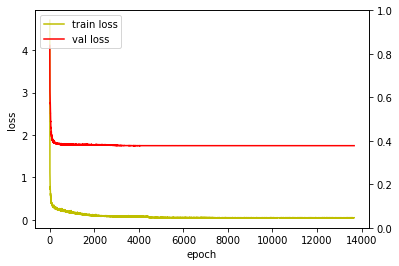

In [81]:

import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')


plt.show()

In [82]:
encoded_num = autoencoder.encoder(np.asarray(X)).numpy()
decoded_num = autoencoder.decoder(encoded_num).numpy()

In [83]:
X

,0,1,2,3,4,5,6,7,8,9,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,4.382027,3.562466,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,6.807382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3.433987,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
238,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.068904,0.0
239,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.248495,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
240,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [84]:
X_en = pd.DataFrame(decoded_num)

In [85]:
X_en

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
0,3.163964,3.721952,5.593583,4.450421,4.128013,4.112650,4.780991,4.081131,5.427715,3.892157,...,6.598506,4.579742,3.815359,6.791264,6.271015,6.397679,6.392658,5.731166,5.865291,5.731773
1,3.195847,3.792757,5.586037,4.390341,4.382901,3.559221,4.769712,4.069177,5.425932,3.873652,...,6.514087,4.514633,3.758350,6.733723,6.278783,6.401593,6.400300,5.760304,5.869693,5.738390
2,3.108047,3.714033,5.611353,4.393342,4.211774,4.154781,4.780704,4.069959,5.419422,3.883294,...,6.657998,4.457948,3.930553,6.842403,6.269092,6.402791,6.453823,5.742839,5.930583,5.732791
3,3.123514,3.760856,5.602511,4.313957,4.287108,4.144454,4.779577,4.072303,5.427415,3.861828,...,6.683034,4.436590,3.883548,6.806963,6.258553,6.392018,6.447385,5.751666,5.889934,5.735355
4,3.156050,3.781427,5.592716,4.455953,4.229683,4.023244,4.774213,4.073045,5.426771,3.899440,...,6.807673,4.564764,3.619983,6.813975,6.261937,6.396791,6.452894,5.682327,5.940601,5.734213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3.150657,3.780856,5.596948,4.356360,4.029825,4.073518,4.781796,4.072069,5.416131,3.887205,...,6.574769,4.525337,3.767073,6.731284,6.277194,6.402352,6.384591,5.712328,5.780955,5.745596
238,3.200072,3.836017,5.615773,4.523544,3.942582,4.048873,4.775586,4.070993,5.420213,3.887311,...,6.589617,4.510764,3.852520,6.680646,6.271936,6.402881,6.396632,5.764400,5.823302,5.734606
239,3.225550,3.824145,5.604848,4.540259,4.027832,3.990514,4.775290,4.073475,5.418048,3.892048,...,6.594105,4.544773,3.776244,6.703798,6.276505,6.404507,6.468142,5.752831,5.853960,5.736193
240,3.058489,3.760675,5.597022,4.332826,4.039719,4.052139,4.775669,4.070295,5.425088,3.878571,...,6.539607,4.495622,3.818852,6.671390,6.270870,6.398693,6.365863,5.764534,5.778267,5.741207


In [86]:
X_en.max()

0       3.474580
1       4.182183
2       5.643066
3       5.148187
4       4.761486
          ...   
1128    6.426912
1129    6.887678
1130    5.837476
1131    6.488294
1132    5.766044
Length: 1133, dtype: float32

In [71]:
encoded_num.shape

(242, 128)

In [72]:
decoded_num.shape

(242, 1133)

-------------------------------------------------------------------------------------------------

In [115]:
x_test[1]*(x_test[1]-x_test[0])

array([50.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [228]:

a = tf.constant([[0, 1], [2, 4]], dtype=tf.float32)
b = tf.constant([[1, 1], [1, 2]], dtype=tf.float32)

In [229]:
(a-b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  0.],
       [ 1.,  2.]], dtype=float32)>

In [230]:
a*(a-b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.,  0.],
       [ 2.,  8.]], dtype=float32)>

In [244]:
tf.constant(list(map(lambda x : 1 if x != 0 else 0, np.array([1,2,3,10,0,0,]))))

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 0], dtype=int32)>